<a href="https://colab.research.google.com/github/MathBSilva/Projeto-393/blob/main/Projeto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Verifica se está no ambiente Google Colab
# Caso for True, extrai o arquivo .zip e usa o caminho dos arquivos do Colab
# Caso for False, o código .py, estando no mesmo diretório da pasta 'data', recebe o conteúdo extraído de .zip
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

# DEBUG
print(IN_COLAB)

if IN_COLAB:
  from zipfile import ZipFile

  with ZipFile('/content/mpeg7_4classes_aug_x8_work.zip', 'r') as myzip:
    myzip.extractall()

True


---

# **Carregando os Datasets de Treinamento e Teste**

---


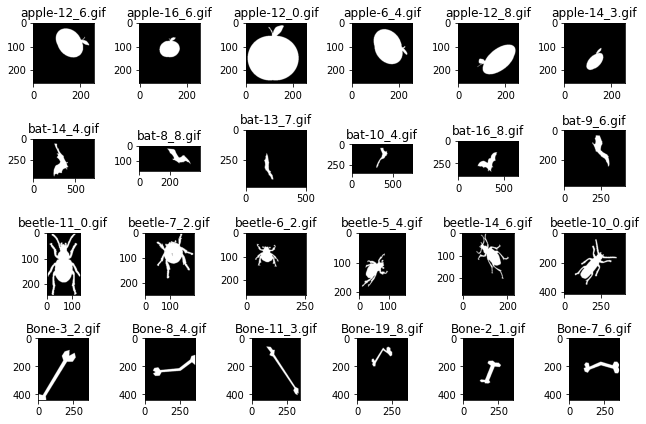

In [ ]:
import os

import numpy as np
from skimage import util, transform, filters, color, measure, morphology, io
from sklearn import model_selection, neighbors, metrics, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

np.random.seed(393)

# 4 classes - Conjunto de Treinamento
if IN_COLAB:
  ds_path = '/content/mpeg7_4classes_aug_x8_work/Train'
else:
  ds_path = 'data/mpeg7_4classes_aug_x8_work/Train' # Caminho local. Mude se necessário

# Lista das pastas na pasta 'ds_path' (classes)
classes_list = sorted(os.listdir(ds_path))

# Lista com as imagens no dataset
image_list = []
# Lista com os rótulos das imagens
label_list = []

# Lista com os nomes das imagens
filename_list_ = []

# Percorre as classes do dataset
for classe in classes_list:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list = os.listdir(os.path.join(ds_path, classe))
    
    # Percorre os arquivos na pasta atual
    for filename in filename_list:
        # Carrega a imagem
        img_temp = io.imread(os.path.join(ds_path, classe, filename), as_gray=True)
        
        # Adiciona a imagem a lista de imagens
        image_list.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_.append(filename)

# Indices das classes dos objetos do dataset
_, _, label_list_idx = np.unique(label_list, return_index=True, return_inverse=True)

# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list[j] for j in np.where(label_list_idx==i)[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list_idx==i)[0][:6]]
fig, ax  = plt.subplots(4, 6, figsize=(9, 6))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))

fig.tight_layout()
plt.show()

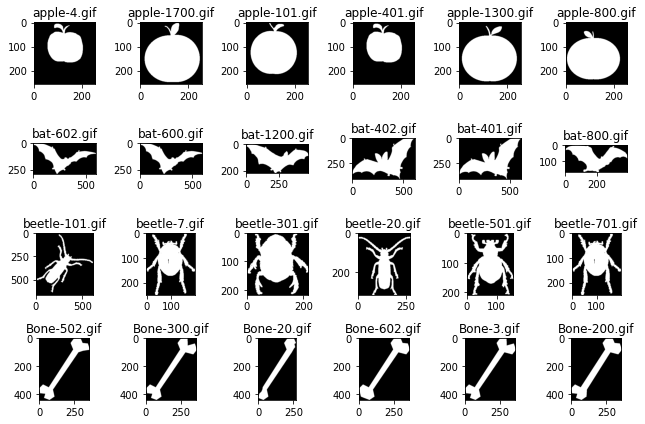

In [ ]:
# 4 classes - Conjunto de Teste
if IN_COLAB:
  ds_path_t = '/content/mpeg7_4classes_aug_x8_work/Test'
else:
  ds_path_t = 'data/mpeg7_4classes_aug_x8_work/Test' # Caminho local. Mude se necessário

# Lista das pastas na pasta 'ds_path_t' (classes)
classes_list = sorted(os.listdir(ds_path_t))

# Lista com as imagens no dataset
image_list_t = []
# Lista com os rótulos das imagens
label_list_t = []

# Lista com os nomes das imagens
filename_list_t_ = []

# Percorre as classes do dataset
for classe in classes_list:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list = os.listdir(os.path.join(ds_path_t, classe))
    
    # Percorre os arquivos na pasta atual
    for filename in filename_list:
        # Carrega a imagem
        img_temp = io.imread(os.path.join(ds_path_t, classe, filename), as_gray=True)
        
        # Adiciona a imagem a lista de imagens
        image_list_t.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list_t.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_t_.append(filename)

# Indices das classes dos objetos do dataset
_, _, label_list_test_idx = np.unique(label_list_t, return_index=True, return_inverse=True)

# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list_t[j] for j in np.where(label_list_test_idx==i)[0][:6]]
    filename_list_temp += [filename_list_t_[j] for j in np.where(label_list_test_idx==i)[0][:6]]
fig, ax  = plt.subplots(4, 6, figsize=(9, 6))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))

fig.tight_layout()
plt.show()

---

# **Criando lista de características do conjunto de Treinamento**

---



Imagem 0 - classe apple


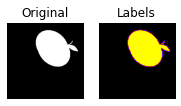

Imagem 1 - classe apple


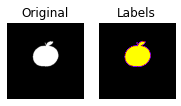

Imagem 2 - classe apple


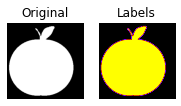

Imagem 3 - classe apple


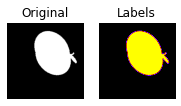

Imagem 4 - classe apple


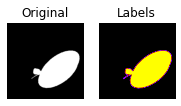

Imagem 5 - classe apple


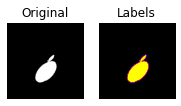

Imagem 6 - classe apple


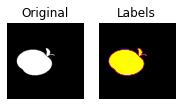

Imagem 7 - classe apple


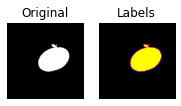

Imagem 8 - classe apple


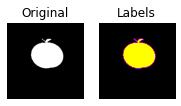

Imagem 9 - classe apple


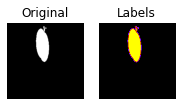

Imagem 10 - classe apple


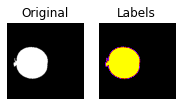

Imagem 11 - classe apple


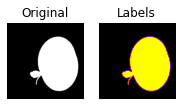

Imagem 12 - classe apple


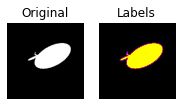

Imagem 13 - classe apple


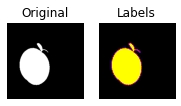

Imagem 14 - classe apple


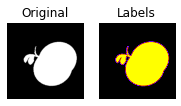

Imagem 15 - classe apple


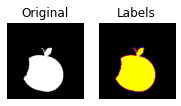

Imagem 16 - classe apple


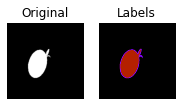

Imagem 17 - classe apple


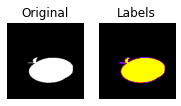

Imagem 18 - classe apple


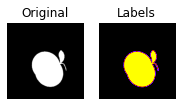

Imagem 19 - classe apple


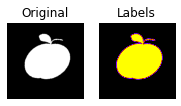

Imagem 20 - classe apple


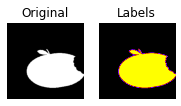

Imagem 21 - classe apple


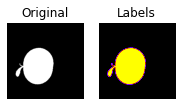

Imagem 22 - classe apple


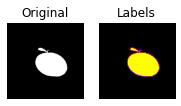

Imagem 23 - classe apple


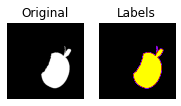

Imagem 24 - classe apple


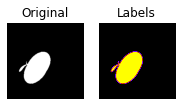

Imagem 25 - classe apple


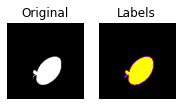

Imagem 26 - classe apple


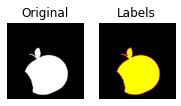

Imagem 27 - classe apple


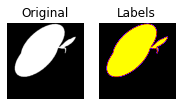

Imagem 28 - classe apple


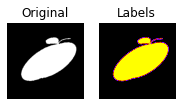

Imagem 29 - classe apple


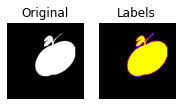

Imagem 30 - classe apple


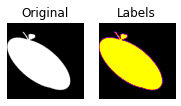

Imagem 31 - classe apple


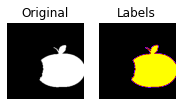

Imagem 32 - classe apple


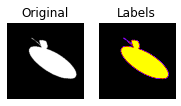

Imagem 33 - classe apple


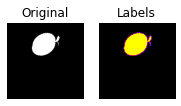

Imagem 34 - classe apple


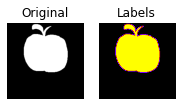

Imagem 35 - classe apple


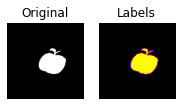

Imagem 36 - classe apple


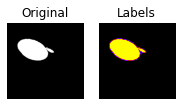

Imagem 37 - classe apple


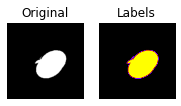

Imagem 38 - classe apple


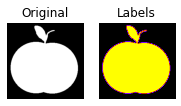

Imagem 39 - classe apple


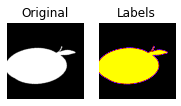

Imagem 40 - classe apple


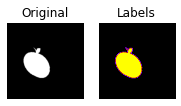

Imagem 41 - classe apple


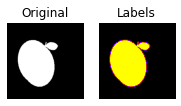

Imagem 42 - classe apple


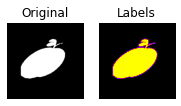

Imagem 43 - classe apple


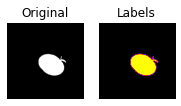

Imagem 44 - classe apple


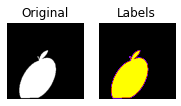

Imagem 45 - classe apple


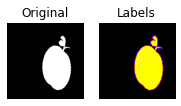

Imagem 46 - classe apple


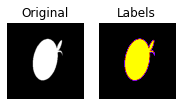

Imagem 47 - classe apple


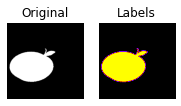

Imagem 48 - classe apple


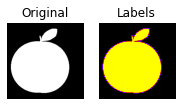

Imagem 49 - classe apple


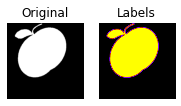

Imagem 50 - classe apple


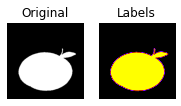

Imagem 51 - classe apple


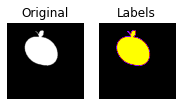

Imagem 52 - classe apple


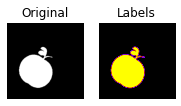

Imagem 53 - classe apple


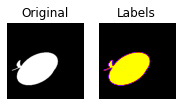

Imagem 54 - classe apple


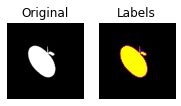

Imagem 55 - classe apple


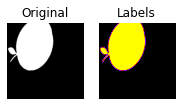

Imagem 56 - classe apple


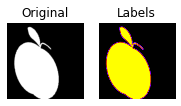

Imagem 57 - classe apple


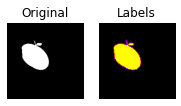

Imagem 58 - classe apple


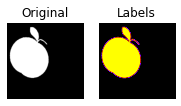

Imagem 59 - classe apple


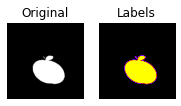

Imagem 60 - classe apple


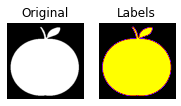

Imagem 61 - classe apple


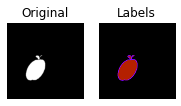

Imagem 62 - classe apple


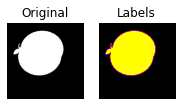

Imagem 63 - classe apple


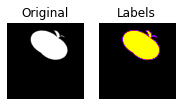

Imagem 64 - classe apple


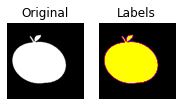

Imagem 65 - classe apple


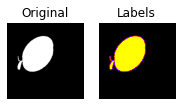

Imagem 66 - classe apple


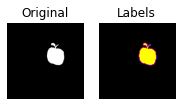

Imagem 67 - classe apple


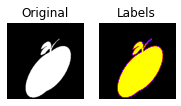

Imagem 68 - classe apple


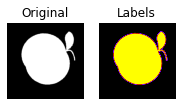

Imagem 69 - classe apple


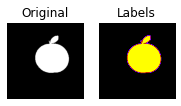

Imagem 70 - classe apple


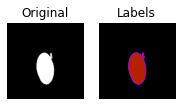

Imagem 71 - classe apple


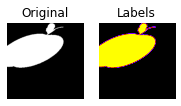

Imagem 72 - classe apple


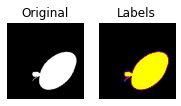

Imagem 73 - classe apple


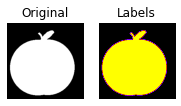

Imagem 74 - classe apple


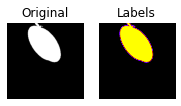

Imagem 75 - classe apple


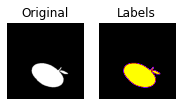

Imagem 76 - classe apple


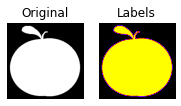

Imagem 77 - classe apple


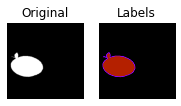

Imagem 78 - classe apple


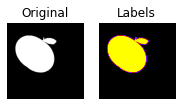

Imagem 79 - classe apple


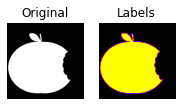

Imagem 80 - classe apple


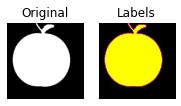

Imagem 81 - classe apple


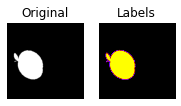

Imagem 82 - classe apple


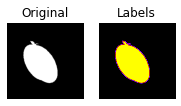

Imagem 83 - classe apple


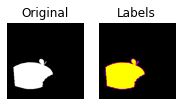

Imagem 84 - classe apple


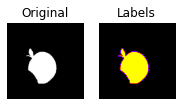

Imagem 85 - classe apple


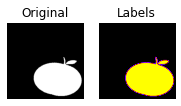

Imagem 86 - classe apple


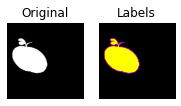

Imagem 87 - classe apple


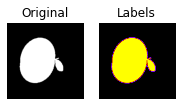

Imagem 88 - classe apple


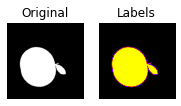

Imagem 89 - classe apple


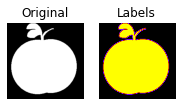

Imagem 90 - classe apple


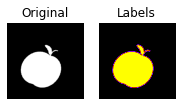

Imagem 91 - classe apple


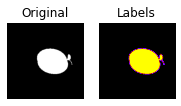

Imagem 92 - classe apple


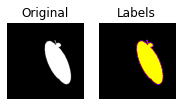

Imagem 93 - classe apple


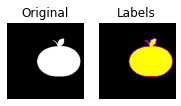

Imagem 94 - classe apple


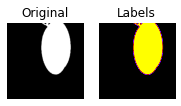

Imagem 95 - classe apple


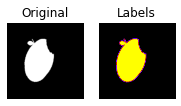

Imagem 96 - classe apple


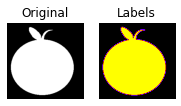

Imagem 97 - classe apple


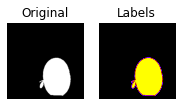

Imagem 98 - classe apple


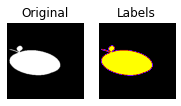

Imagem 99 - classe apple


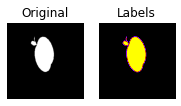

Imagem 100 - classe apple


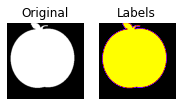

Imagem 101 - classe apple


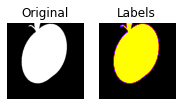

Imagem 102 - classe apple


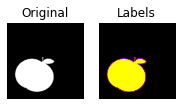

Imagem 103 - classe apple


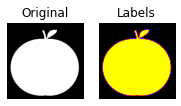

Imagem 104 - classe apple


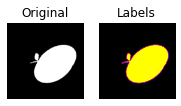

Imagem 105 - classe apple


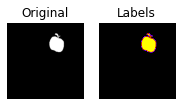

Imagem 106 - classe apple


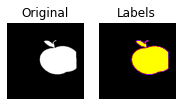

Imagem 107 - classe apple


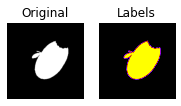

Imagem 108 - classe apple


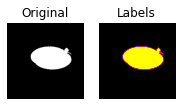

Imagem 109 - classe apple


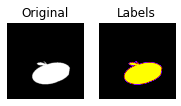

Imagem 110 - classe apple


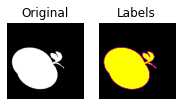

Imagem 111 - classe apple


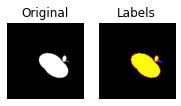

Imagem 112 - classe apple


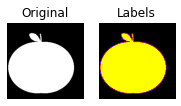

Imagem 113 - classe apple


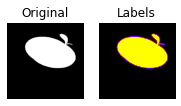

Imagem 114 - classe apple


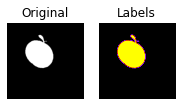

Imagem 115 - classe apple


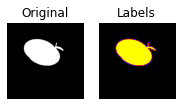

Imagem 116 - classe apple


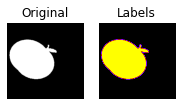

Imagem 117 - classe apple


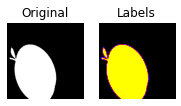

Imagem 118 - classe apple


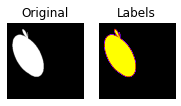

Imagem 119 - classe apple


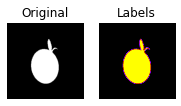

Imagem 120 - classe apple


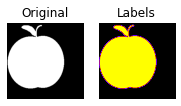

Imagem 121 - classe apple


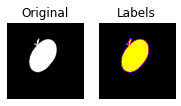

Imagem 122 - classe apple


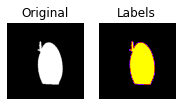

Imagem 123 - classe apple


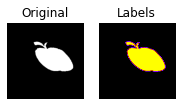

Imagem 124 - classe apple


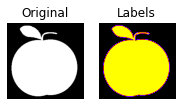

Imagem 125 - classe apple


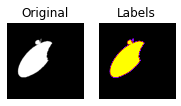

Imagem 126 - classe bat


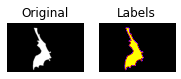

Imagem 127 - classe bat


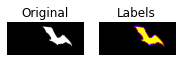

Imagem 128 - classe bat


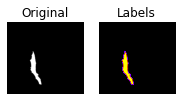

Imagem 129 - classe bat


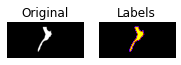

Imagem 130 - classe bat


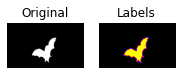

Imagem 131 - classe bat


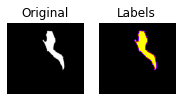

Imagem 132 - classe bat


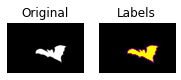

Imagem 133 - classe bat


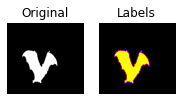

Imagem 134 - classe bat


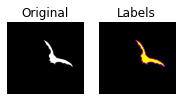

Imagem 135 - classe bat


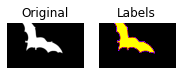

Imagem 136 - classe bat


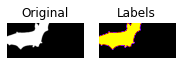

Imagem 137 - classe bat


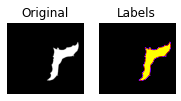

Imagem 138 - classe bat


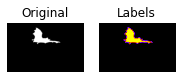

Imagem 139 - classe bat


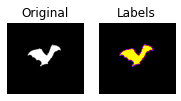

Imagem 140 - classe bat


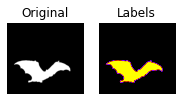

Imagem 141 - classe bat


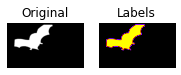

Imagem 142 - classe bat


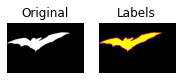

Imagem 143 - classe bat


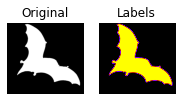

Imagem 144 - classe bat


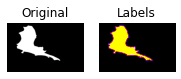

Imagem 145 - classe bat


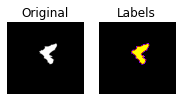

Imagem 146 - classe bat


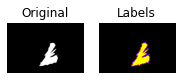

Imagem 147 - classe bat


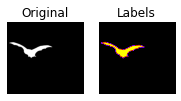

Imagem 148 - classe bat


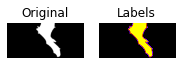

Imagem 149 - classe bat


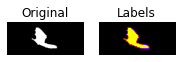

Imagem 150 - classe bat


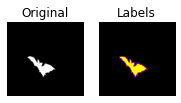

Imagem 151 - classe bat


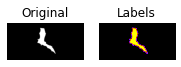

Imagem 152 - classe bat


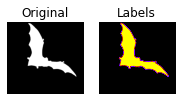

Imagem 153 - classe bat


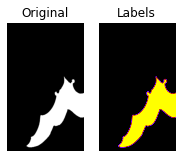

Imagem 154 - classe bat


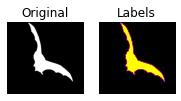

Imagem 155 - classe bat


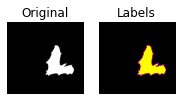

Imagem 156 - classe bat


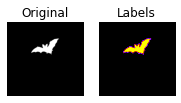

Imagem 157 - classe bat


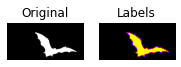

Imagem 158 - classe bat


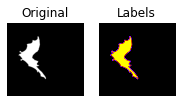

Imagem 159 - classe bat


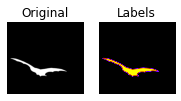

Imagem 160 - classe bat


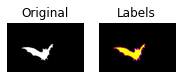

Imagem 161 - classe bat


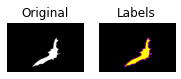

Imagem 162 - classe bat


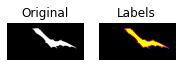

Imagem 163 - classe bat


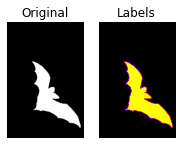

Imagem 164 - classe bat


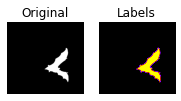

Imagem 165 - classe bat


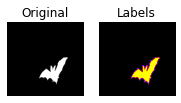

Imagem 166 - classe bat


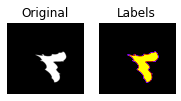

Imagem 167 - classe bat


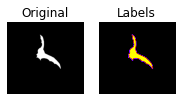

Imagem 168 - classe bat


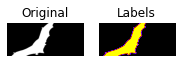

Imagem 169 - classe bat


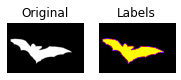

Imagem 170 - classe bat


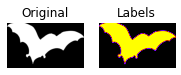

Imagem 171 - classe bat


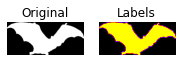

Imagem 172 - classe bat


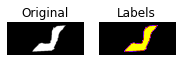

Imagem 173 - classe bat


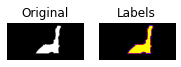

Imagem 174 - classe bat


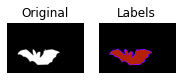

Imagem 175 - classe bat


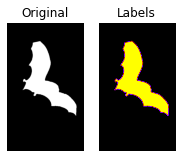

Imagem 176 - classe bat


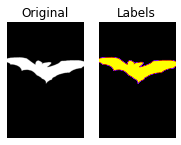

Imagem 177 - classe bat


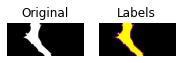

Imagem 178 - classe bat


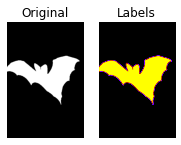

Imagem 179 - classe bat


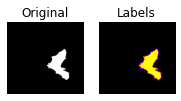

Imagem 180 - classe bat


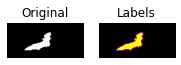

Imagem 181 - classe bat


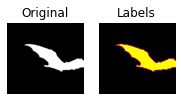

Imagem 182 - classe bat


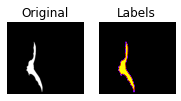

Imagem 183 - classe bat


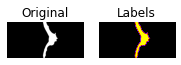

Imagem 184 - classe bat


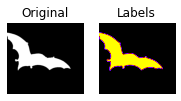

Imagem 185 - classe bat


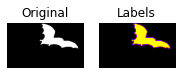

Imagem 186 - classe bat


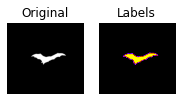

Imagem 187 - classe bat


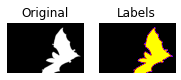

Imagem 188 - classe bat


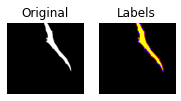

Imagem 189 - classe bat


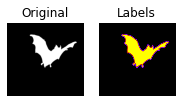

Imagem 190 - classe bat


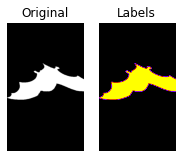

Imagem 191 - classe bat


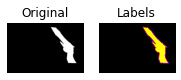

Imagem 192 - classe bat


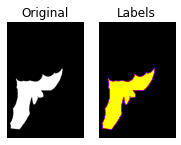

Imagem 193 - classe bat


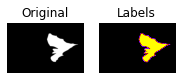

Imagem 194 - classe bat


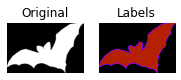

Imagem 195 - classe bat


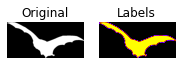

Imagem 196 - classe bat


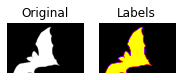

Imagem 197 - classe bat


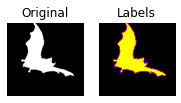

Imagem 198 - classe bat


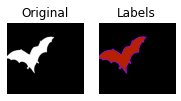

Imagem 199 - classe bat


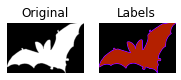

Imagem 200 - classe bat


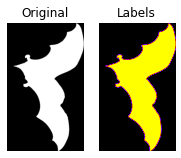

Imagem 201 - classe bat


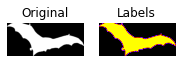

Imagem 202 - classe bat


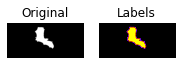

Imagem 203 - classe bat


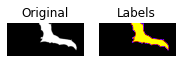

Imagem 204 - classe bat


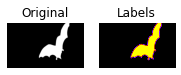

Imagem 205 - classe bat


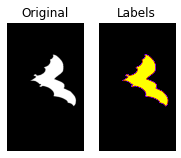

Imagem 206 - classe bat


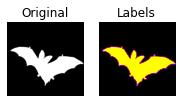

Imagem 207 - classe bat


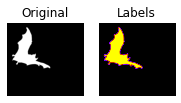

Imagem 208 - classe bat


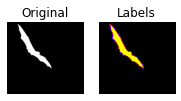

Imagem 209 - classe bat


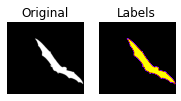

Imagem 210 - classe bat


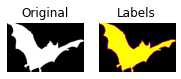

Imagem 211 - classe bat


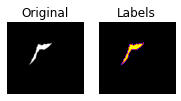

Imagem 212 - classe bat


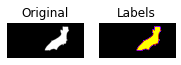

Imagem 213 - classe bat


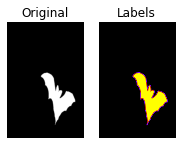

Imagem 214 - classe bat


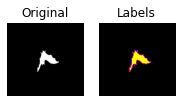

Imagem 215 - classe bat


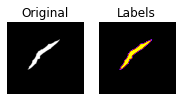

Imagem 216 - classe bat


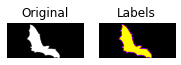

Imagem 217 - classe bat


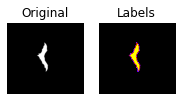

Imagem 218 - classe bat


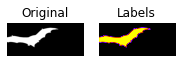

Imagem 219 - classe bat


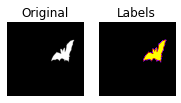

Imagem 220 - classe bat


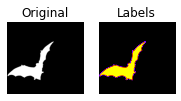

Imagem 221 - classe bat


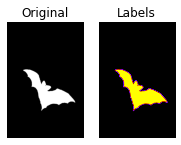

Imagem 222 - classe bat


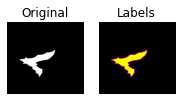

Imagem 223 - classe bat


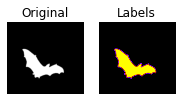

Imagem 224 - classe bat


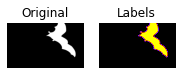

Imagem 225 - classe bat


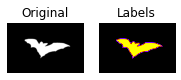

Imagem 226 - classe bat


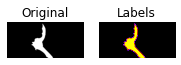

Imagem 227 - classe bat


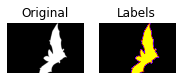

Imagem 228 - classe bat


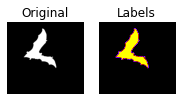

Imagem 229 - classe bat


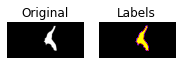

Imagem 230 - classe bat


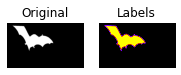

Imagem 231 - classe bat


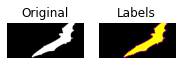

Imagem 232 - classe bat


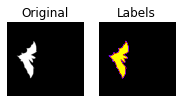

Imagem 233 - classe bat


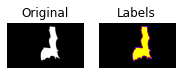

Imagem 234 - classe bat


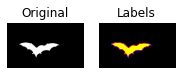

Imagem 235 - classe bat


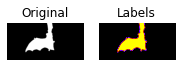

Imagem 236 - classe bat


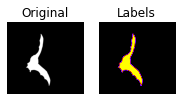

Imagem 237 - classe bat


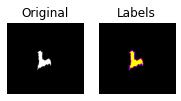

Imagem 238 - classe bat


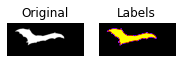

Imagem 239 - classe bat


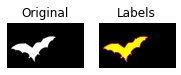

Imagem 240 - classe bat


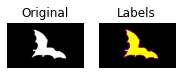

Imagem 241 - classe bat


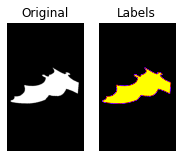

Imagem 242 - classe bat


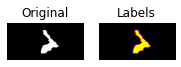

Imagem 243 - classe bat


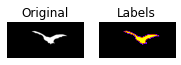

Imagem 244 - classe bat


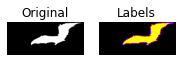

Imagem 245 - classe bat


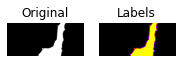

Imagem 246 - classe bat


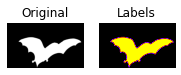

Imagem 247 - classe bat


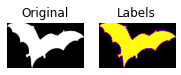

Imagem 248 - classe bat


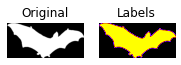

Imagem 249 - classe bat


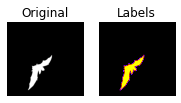

Imagem 250 - classe bat


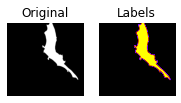

Imagem 251 - classe bat


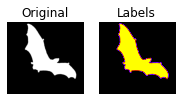

Imagem 252 - classe beetle


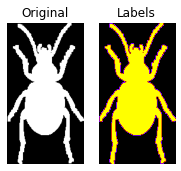

Imagem 253 - classe beetle


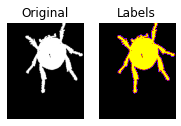

Imagem 254 - classe beetle


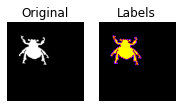

Imagem 255 - classe beetle


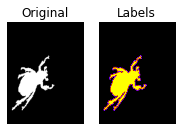

Imagem 256 - classe beetle


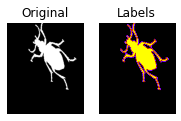

Imagem 257 - classe beetle


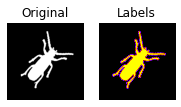

Imagem 258 - classe beetle


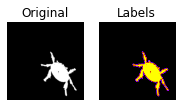

Imagem 259 - classe beetle


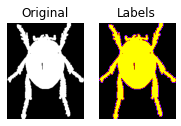

Imagem 260 - classe beetle


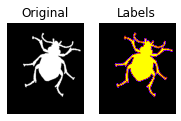

Imagem 261 - classe beetle


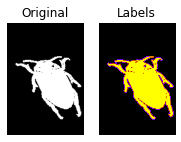

Imagem 262 - classe beetle


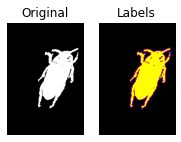

Imagem 263 - classe beetle


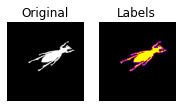

Imagem 264 - classe beetle


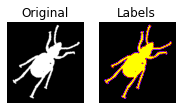

Imagem 265 - classe beetle


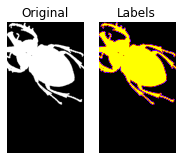

Imagem 266 - classe beetle


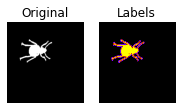

Imagem 267 - classe beetle


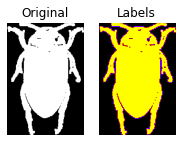

Imagem 268 - classe beetle


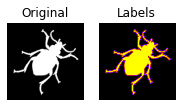

Imagem 269 - classe beetle


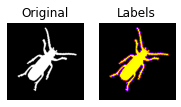

Imagem 270 - classe beetle


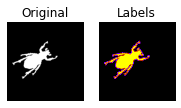

Imagem 271 - classe beetle


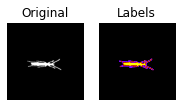

Imagem 272 - classe beetle


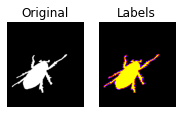

Imagem 273 - classe beetle


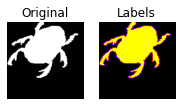

Imagem 274 - classe beetle


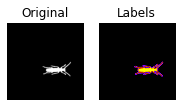

Imagem 275 - classe beetle


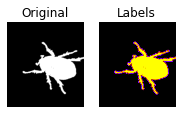

Imagem 276 - classe beetle


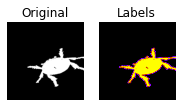

Imagem 277 - classe beetle


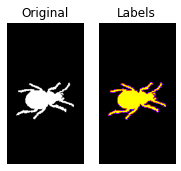

Imagem 278 - classe beetle


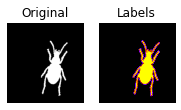

Imagem 279 - classe beetle


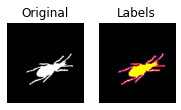

Imagem 280 - classe beetle


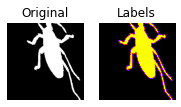

Imagem 281 - classe beetle


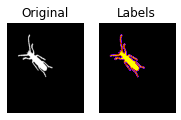

Imagem 282 - classe beetle


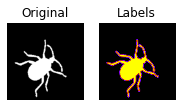

Imagem 283 - classe beetle


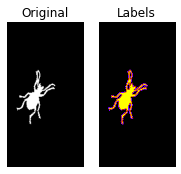

Imagem 284 - classe beetle


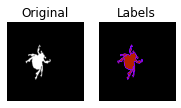

Imagem 285 - classe beetle


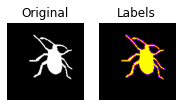

Imagem 286 - classe beetle


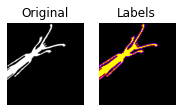

Imagem 287 - classe beetle


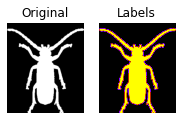

Imagem 288 - classe beetle


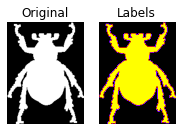

Imagem 289 - classe beetle


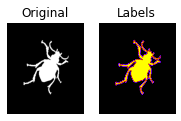

Imagem 290 - classe beetle


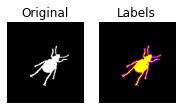

Imagem 291 - classe beetle


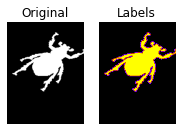

Imagem 292 - classe beetle


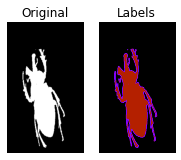

Imagem 293 - classe beetle


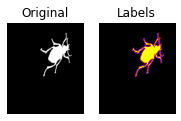

Imagem 294 - classe beetle


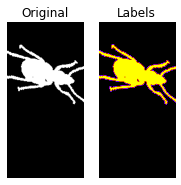

Imagem 295 - classe beetle


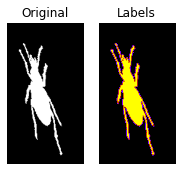

Imagem 296 - classe beetle


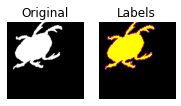

Imagem 297 - classe beetle


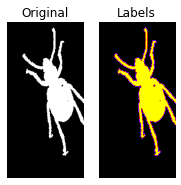

Imagem 298 - classe beetle


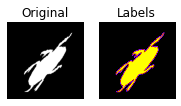

Imagem 299 - classe beetle


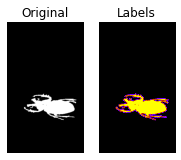

Imagem 300 - classe beetle


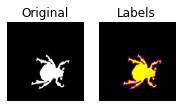

Imagem 301 - classe beetle


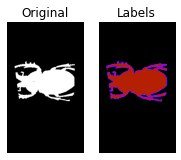

Imagem 302 - classe beetle


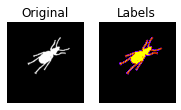

Imagem 303 - classe beetle


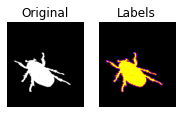

Imagem 304 - classe beetle


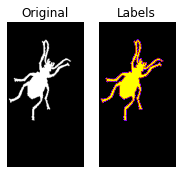

Imagem 305 - classe beetle


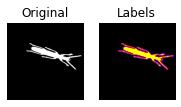

Imagem 306 - classe beetle


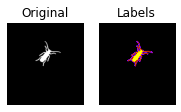

Imagem 307 - classe beetle


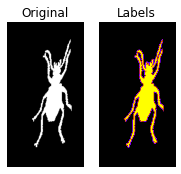

Imagem 308 - classe beetle


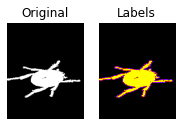

Imagem 309 - classe beetle


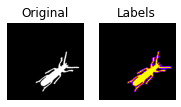

Imagem 310 - classe beetle


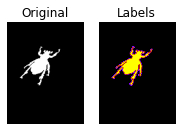

Imagem 311 - classe beetle


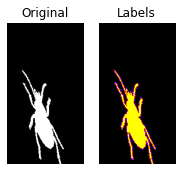

Imagem 312 - classe beetle


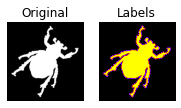

Imagem 313 - classe beetle


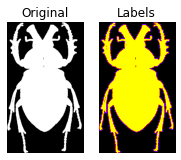

Imagem 314 - classe beetle


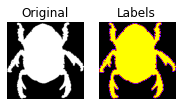

Imagem 315 - classe beetle


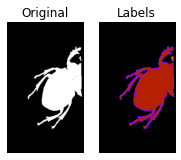

Imagem 316 - classe beetle


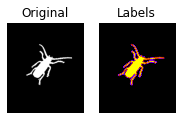

Imagem 317 - classe beetle


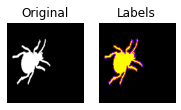

Imagem 318 - classe beetle


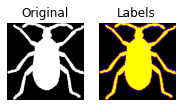

Imagem 319 - classe beetle


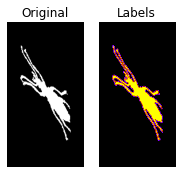

Imagem 320 - classe beetle


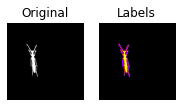

Imagem 321 - classe beetle


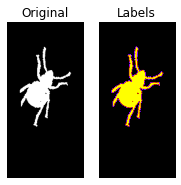

Imagem 322 - classe beetle


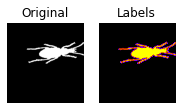

Imagem 323 - classe beetle


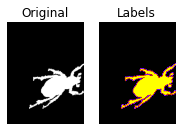

Imagem 324 - classe beetle


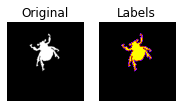

Imagem 325 - classe beetle


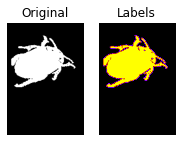

Imagem 326 - classe beetle


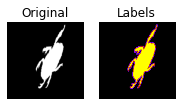

Imagem 327 - classe beetle


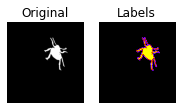

Imagem 328 - classe beetle


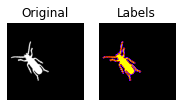

Imagem 329 - classe beetle


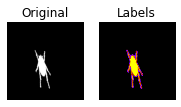

Imagem 330 - classe beetle


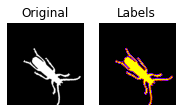

Imagem 331 - classe beetle


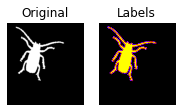

Imagem 332 - classe beetle


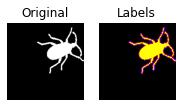

Imagem 333 - classe beetle


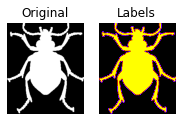

Imagem 334 - classe beetle


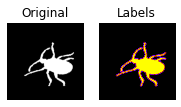

Imagem 335 - classe beetle


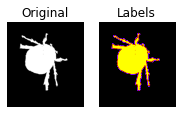

Imagem 336 - classe beetle


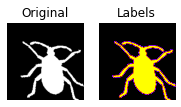

Imagem 337 - classe beetle


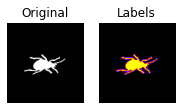

Imagem 338 - classe beetle


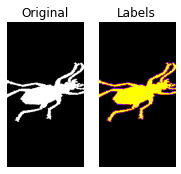

Imagem 339 - classe beetle


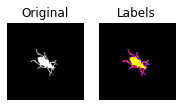

Imagem 340 - classe beetle


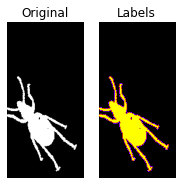

Imagem 341 - classe beetle


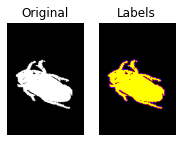

Imagem 342 - classe beetle


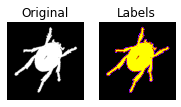

Imagem 343 - classe beetle


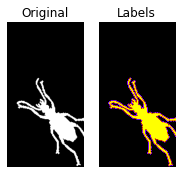

Imagem 344 - classe beetle


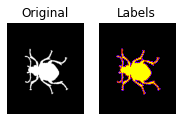

Imagem 345 - classe beetle


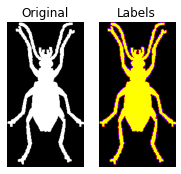

Imagem 346 - classe beetle


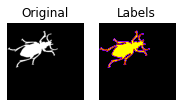

Imagem 347 - classe beetle


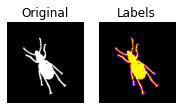

Imagem 348 - classe beetle


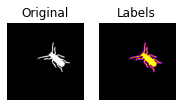

Imagem 349 - classe beetle


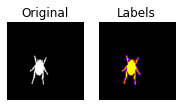

Imagem 350 - classe beetle


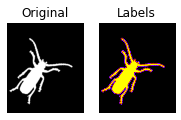

Imagem 351 - classe beetle


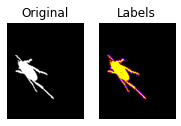

Imagem 352 - classe beetle


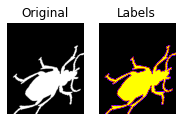

Imagem 353 - classe beetle


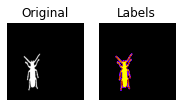

Imagem 354 - classe beetle


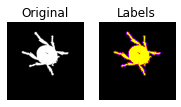

Imagem 355 - classe beetle


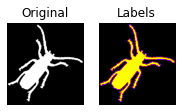

Imagem 356 - classe beetle


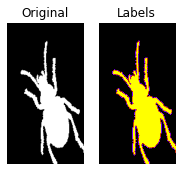

Imagem 357 - classe beetle


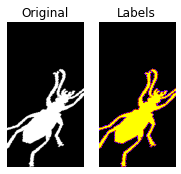

Imagem 358 - classe beetle


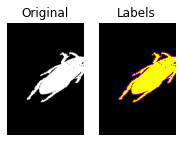

Imagem 359 - classe beetle


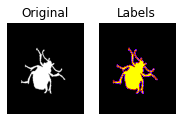

Imagem 360 - classe beetle


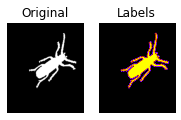

Imagem 361 - classe beetle


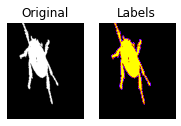

Imagem 362 - classe beetle


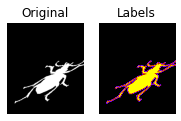

Imagem 363 - classe beetle


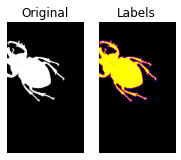

Imagem 364 - classe beetle


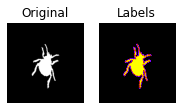

Imagem 365 - classe beetle


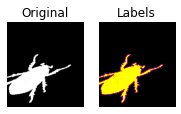

Imagem 366 - classe beetle


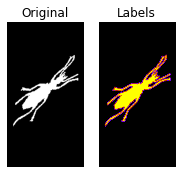

Imagem 367 - classe beetle


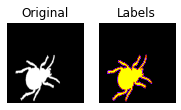

Imagem 368 - classe beetle


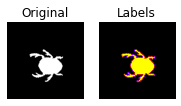

Imagem 369 - classe beetle


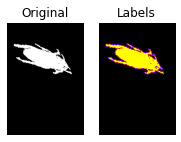

Imagem 370 - classe beetle


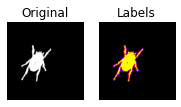

Imagem 371 - classe beetle


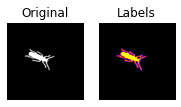

Imagem 372 - classe beetle


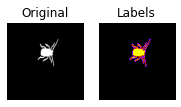

Imagem 373 - classe beetle


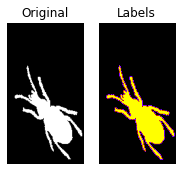

Imagem 374 - classe beetle


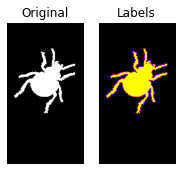

Imagem 375 - classe beetle


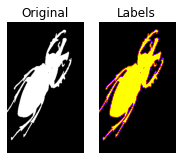

Imagem 376 - classe beetle


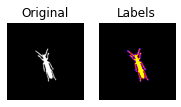

Imagem 377 - classe beetle


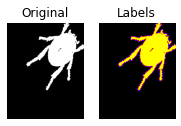

Imagem 378 - classe bone


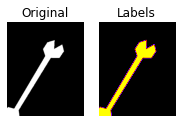

Imagem 379 - classe bone


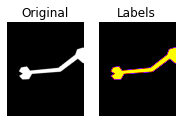

Imagem 380 - classe bone


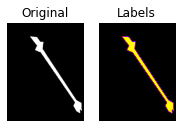

Imagem 381 - classe bone


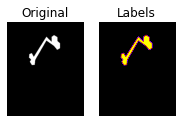

Imagem 382 - classe bone


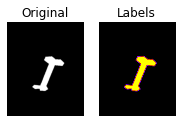

Imagem 383 - classe bone


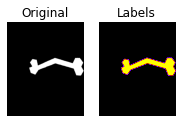

Imagem 384 - classe bone


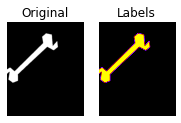

Imagem 385 - classe bone


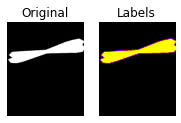

Imagem 386 - classe bone


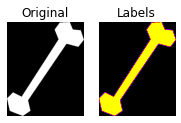

Imagem 387 - classe bone


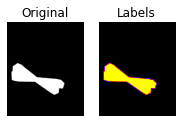

Imagem 388 - classe bone


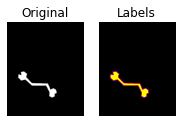

Imagem 389 - classe bone


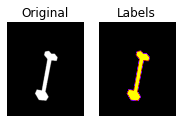

Imagem 390 - classe bone


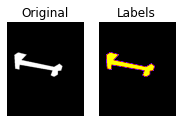

Imagem 391 - classe bone


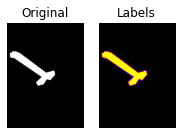

Imagem 392 - classe bone


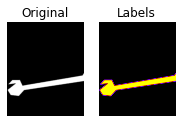

Imagem 393 - classe bone


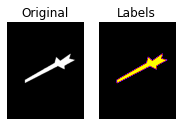

Imagem 394 - classe bone


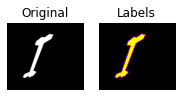

Imagem 395 - classe bone


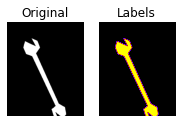

Imagem 396 - classe bone


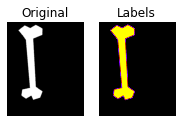

Imagem 397 - classe bone


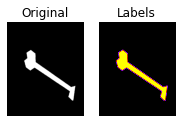

Imagem 398 - classe bone


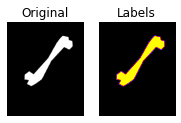

Imagem 399 - classe bone


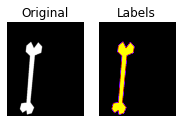

Imagem 400 - classe bone


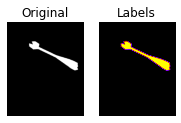

Imagem 401 - classe bone


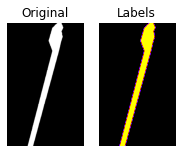

Imagem 402 - classe bone


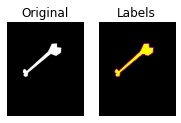

Imagem 403 - classe bone


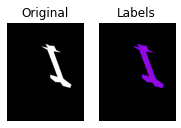

Imagem 404 - classe bone


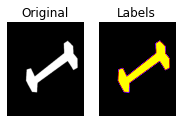

Imagem 405 - classe bone


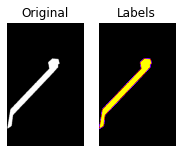

Imagem 406 - classe bone


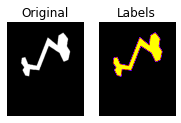

Imagem 407 - classe bone


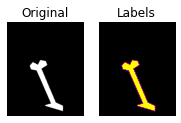

Imagem 408 - classe bone


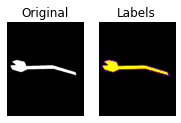

Imagem 409 - classe bone


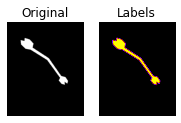

Imagem 410 - classe bone


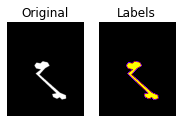

Imagem 411 - classe bone


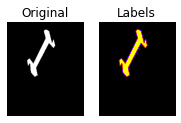

Imagem 412 - classe bone


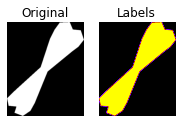

Imagem 413 - classe bone


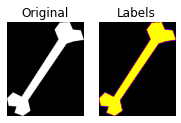

Imagem 414 - classe bone


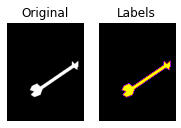

Imagem 415 - classe bone


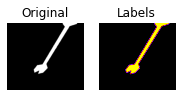

Imagem 416 - classe bone


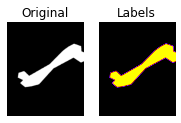

Imagem 417 - classe bone


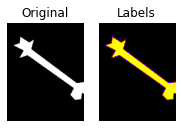

Imagem 418 - classe bone


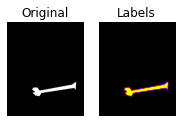

Imagem 419 - classe bone


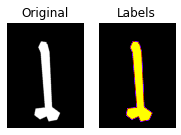

Imagem 420 - classe bone


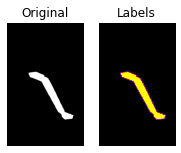

Imagem 421 - classe bone


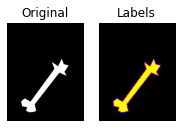

Imagem 422 - classe bone


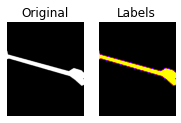

Imagem 423 - classe bone


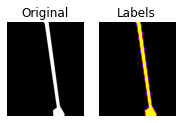

Imagem 424 - classe bone


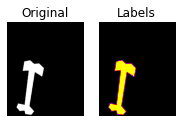

Imagem 425 - classe bone


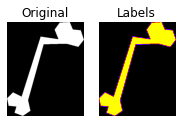

Imagem 426 - classe bone


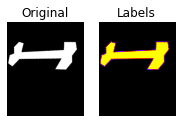

Imagem 427 - classe bone


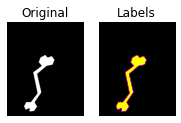

Imagem 428 - classe bone


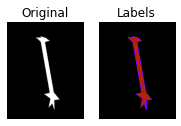

Imagem 429 - classe bone


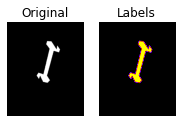

Imagem 430 - classe bone


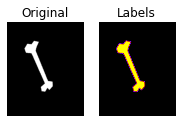

Imagem 431 - classe bone


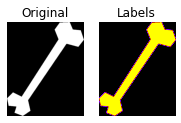

Imagem 432 - classe bone


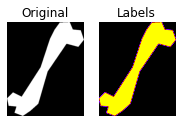

Imagem 433 - classe bone


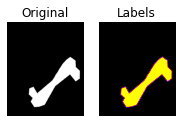

Imagem 434 - classe bone


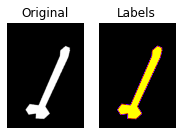

Imagem 435 - classe bone


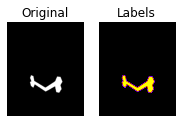

Imagem 436 - classe bone


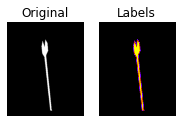

Imagem 437 - classe bone


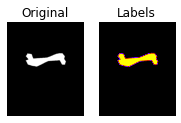

Imagem 438 - classe bone


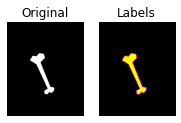

Imagem 439 - classe bone


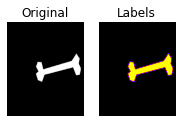

Imagem 440 - classe bone


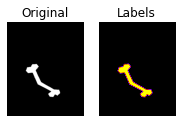

Imagem 441 - classe bone


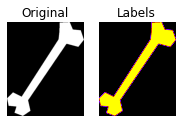

Imagem 442 - classe bone


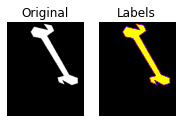

Imagem 443 - classe bone


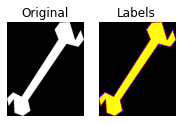

Imagem 444 - classe bone


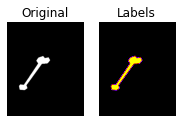

Imagem 445 - classe bone


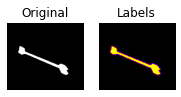

Imagem 446 - classe bone


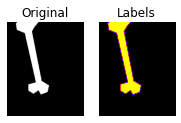

Imagem 447 - classe bone


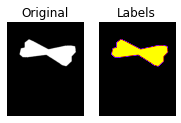

Imagem 448 - classe bone


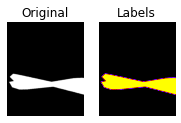

Imagem 449 - classe bone


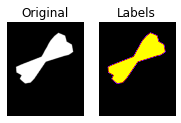

Imagem 450 - classe bone


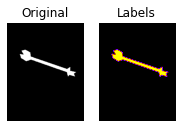

Imagem 451 - classe bone


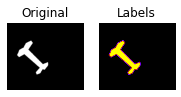

Imagem 452 - classe bone


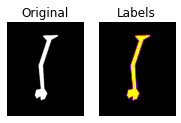

Imagem 453 - classe bone


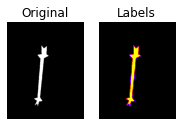

Imagem 454 - classe bone


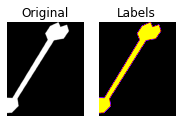

Imagem 455 - classe bone


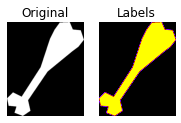

Imagem 456 - classe bone


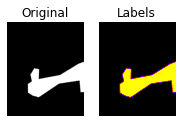

Imagem 457 - classe bone


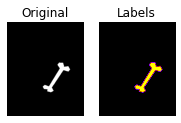

Imagem 458 - classe bone


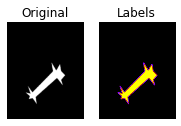

Imagem 459 - classe bone


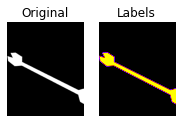

Imagem 460 - classe bone


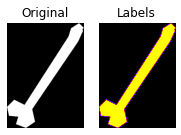

Imagem 461 - classe bone


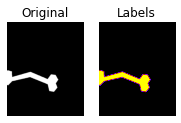

Imagem 462 - classe bone


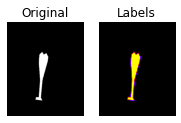

Imagem 463 - classe bone


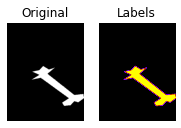

Imagem 464 - classe bone


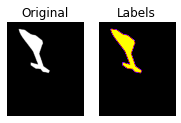

Imagem 465 - classe bone


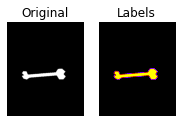

Imagem 466 - classe bone


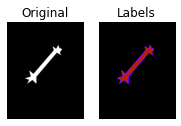

Imagem 467 - classe bone


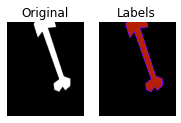

Imagem 468 - classe bone


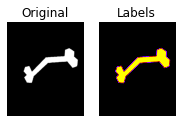

Imagem 469 - classe bone


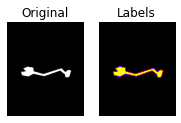

Imagem 470 - classe bone


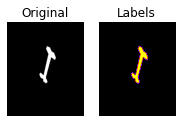

Imagem 471 - classe bone


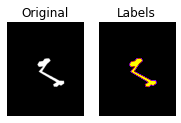

Imagem 472 - classe bone


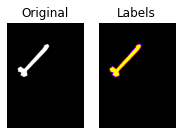

Imagem 473 - classe bone


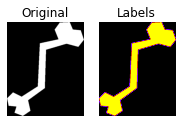

Imagem 474 - classe bone


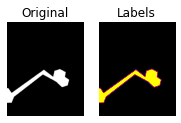

Imagem 475 - classe bone


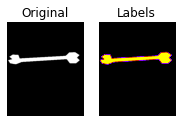

Imagem 476 - classe bone


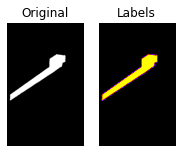

Imagem 477 - classe bone


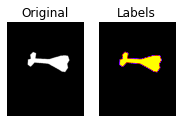

Imagem 478 - classe bone


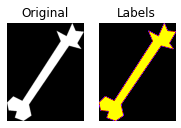

Imagem 479 - classe bone


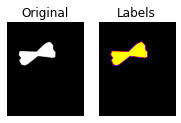

Imagem 480 - classe bone


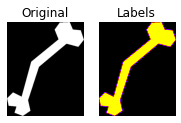

Imagem 481 - classe bone


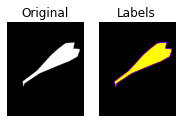

Imagem 482 - classe bone


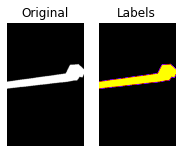

Imagem 483 - classe bone


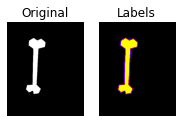

Imagem 484 - classe bone


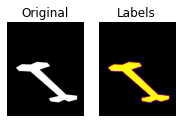

Imagem 485 - classe bone


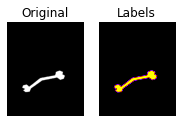

Imagem 486 - classe bone


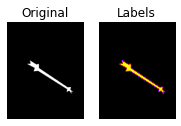

Imagem 487 - classe bone


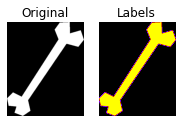

Imagem 488 - classe bone


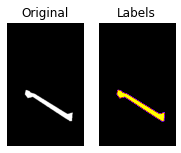

Imagem 489 - classe bone


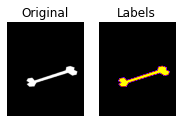

Imagem 490 - classe bone


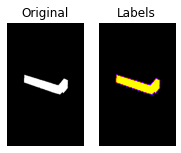

Imagem 491 - classe bone


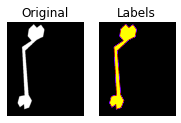

Imagem 492 - classe bone


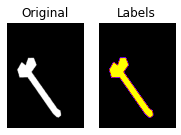

Imagem 493 - classe bone


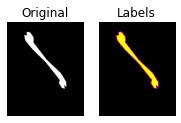

Imagem 494 - classe bone


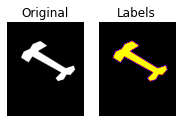

Imagem 495 - classe bone


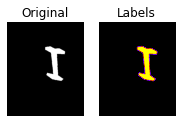

Imagem 496 - classe bone


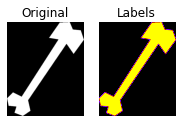

Imagem 497 - classe bone


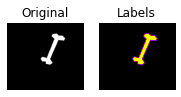

Imagem 498 - classe bone


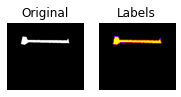

Imagem 499 - classe bone


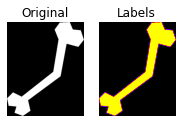

Imagem 500 - classe bone


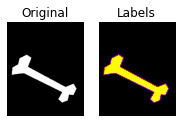

Imagem 501 - classe bone


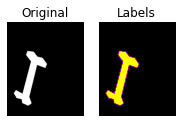

Imagem 502 - classe bone


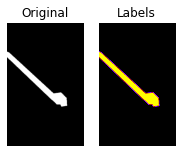

Imagem 503 - classe bone


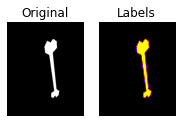

In [ ]:
# Nomes das caracteristicas computadas
features = ['area', 'major_axis', 'minor_axis', 'solidity', 'perimeter']
# Arranjo 2D com as caracteristicas das imagens
feature_mat = []

# Lista com os rótulos das imagens
list_label = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    # DEBUG
    print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)

    # Calcula a imagem de rótulos
    im_lbl = measure.label(image)

    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    plots = {'Original': image, 'Labels': im_lbl}
    fig, ax = plt.subplots(1, len(plots), figsize=(3,6))
    for n, (title, img) in enumerate(plots.items()):
        cmap = plt.cm.gnuplot if n == len(plots) - 1 else plt.cm.gray
        ax[n].imshow(img, cmap=cmap)
        ax[n].axis('off')
        ax[n].set_title(title)
    plt.show(fig)

    props = measure.regionprops(im_lbl)
    
    # Itera pelas propriedades computadas
    for prop in props:
        # Prop. 0: Area
        area = prop.area
       
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity = prop.solidity 
        
        # Prop. 4: Perímetro
        perimeter = prop.perimeter 

        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, perimeter]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat.append(feature_list)

---
# **Criando lista de características do conjunto de Teste**

---



Imagem 0 - classe apple


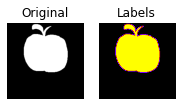

Imagem 1 - classe apple


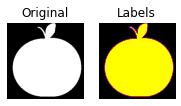

Imagem 2 - classe apple


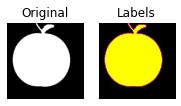

Imagem 3 - classe apple


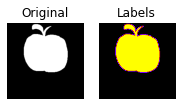

Imagem 4 - classe apple


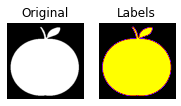

Imagem 5 - classe apple


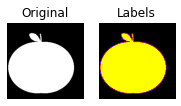

Imagem 6 - classe apple


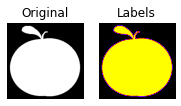

Imagem 7 - classe apple


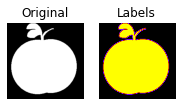

Imagem 8 - classe apple


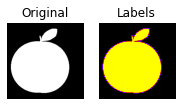

Imagem 9 - classe apple


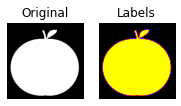

Imagem 10 - classe apple


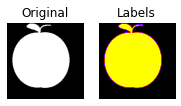

Imagem 11 - classe apple


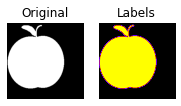

Imagem 12 - classe apple


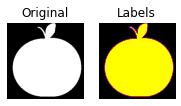

Imagem 13 - classe apple


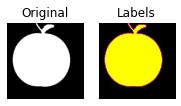

Imagem 14 - classe apple


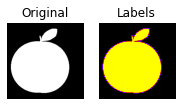

Imagem 15 - classe apple


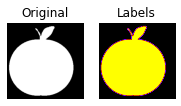

Imagem 16 - classe apple


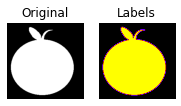

Imagem 17 - classe apple


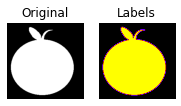

Imagem 18 - classe apple


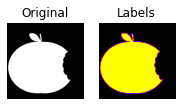

Imagem 19 - classe apple


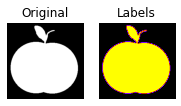

Imagem 20 - classe apple


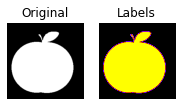

Imagem 21 - classe apple


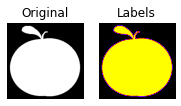

Imagem 22 - classe apple


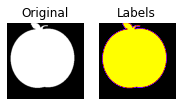

Imagem 23 - classe apple


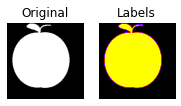

Imagem 24 - classe apple


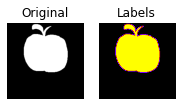

Imagem 25 - classe apple


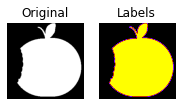

Imagem 26 - classe apple


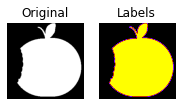

Imagem 27 - classe apple


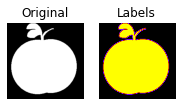

Imagem 28 - classe apple


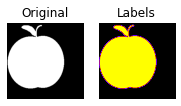

Imagem 29 - classe apple


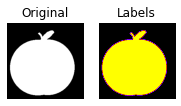

Imagem 30 - classe apple


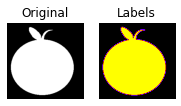

Imagem 31 - classe apple


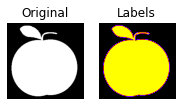

Imagem 32 - classe apple


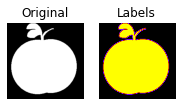

Imagem 33 - classe apple


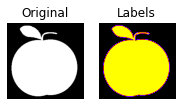

Imagem 34 - classe apple


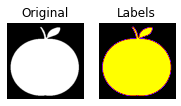

Imagem 35 - classe apple


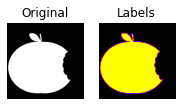

Imagem 36 - classe apple


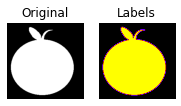

Imagem 37 - classe apple


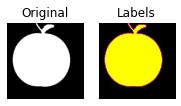

Imagem 38 - classe apple


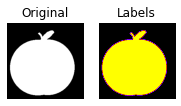

Imagem 39 - classe apple


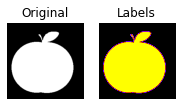

Imagem 40 - classe apple


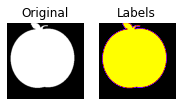

Imagem 41 - classe apple


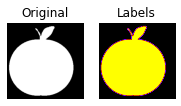

Imagem 42 - classe apple


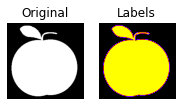

Imagem 43 - classe apple


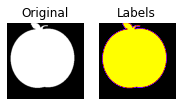

Imagem 44 - classe apple


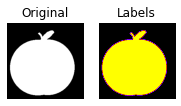

Imagem 45 - classe apple


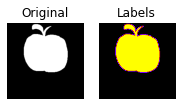

Imagem 46 - classe apple


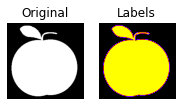

Imagem 47 - classe apple


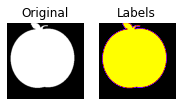

Imagem 48 - classe apple


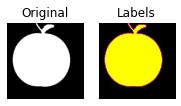

Imagem 49 - classe apple


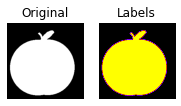

Imagem 50 - classe apple


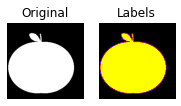

Imagem 51 - classe apple


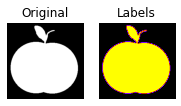

Imagem 52 - classe apple


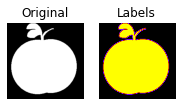

Imagem 53 - classe apple


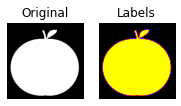

Imagem 54 - classe bat


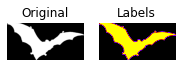

Imagem 55 - classe bat


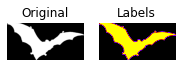

Imagem 56 - classe bat


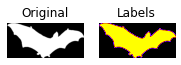

Imagem 57 - classe bat


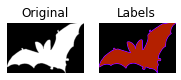

Imagem 58 - classe bat


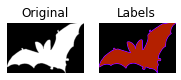

Imagem 59 - classe bat


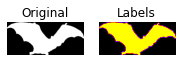

Imagem 60 - classe bat


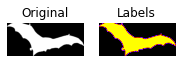

Imagem 61 - classe bat


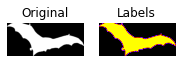

Imagem 62 - classe bat


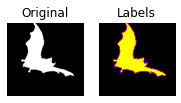

Imagem 63 - classe bat


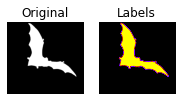

Imagem 64 - classe bat


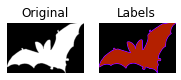

Imagem 65 - classe bat


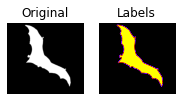

Imagem 66 - classe bat


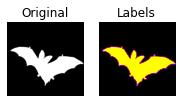

Imagem 67 - classe bat


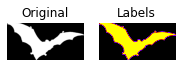

Imagem 68 - classe bat


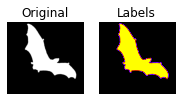

Imagem 69 - classe bat


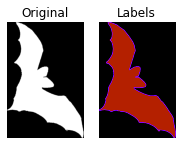

Imagem 70 - classe bat


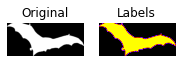

Imagem 71 - classe bat


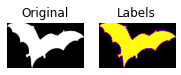

Imagem 72 - classe bat


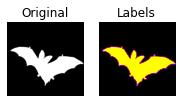

Imagem 73 - classe bat


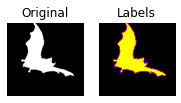

Imagem 74 - classe bat


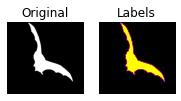

Imagem 75 - classe bat


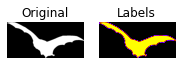

Imagem 76 - classe bat


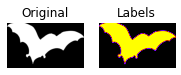

Imagem 77 - classe bat


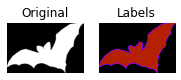

Imagem 78 - classe bat


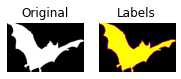

Imagem 79 - classe bat


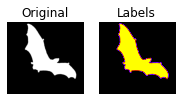

Imagem 80 - classe bat


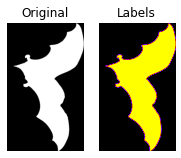

Imagem 81 - classe bat


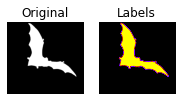

Imagem 82 - classe bat


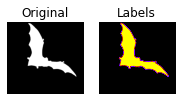

Imagem 83 - classe bat


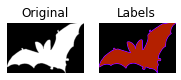

Imagem 84 - classe bat


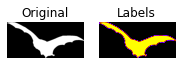

Imagem 85 - classe bat


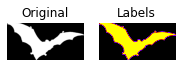

Imagem 86 - classe bat


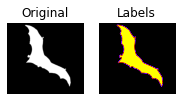

Imagem 87 - classe bat


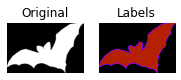

Imagem 88 - classe bat


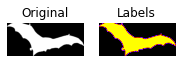

Imagem 89 - classe bat


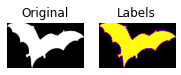

Imagem 90 - classe bat


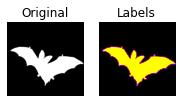

Imagem 91 - classe bat


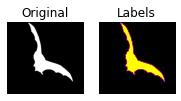

Imagem 92 - classe bat


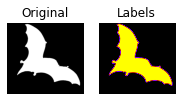

Imagem 93 - classe bat


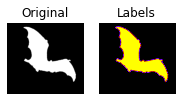

Imagem 94 - classe bat


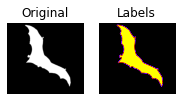

Imagem 95 - classe bat


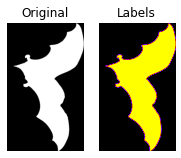

Imagem 96 - classe bat


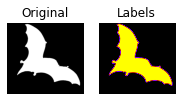

Imagem 97 - classe bat


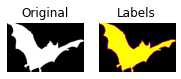

Imagem 98 - classe bat


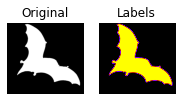

Imagem 99 - classe bat


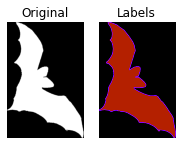

Imagem 100 - classe bat


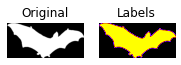

Imagem 101 - classe bat


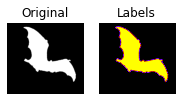

Imagem 102 - classe bat


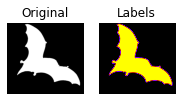

Imagem 103 - classe bat


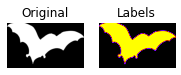

Imagem 104 - classe bat


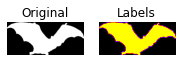

Imagem 105 - classe bat


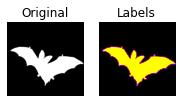

Imagem 106 - classe bat


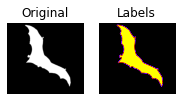

Imagem 107 - classe bat


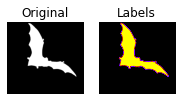

Imagem 108 - classe beetle


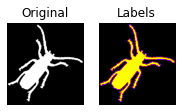

Imagem 109 - classe beetle


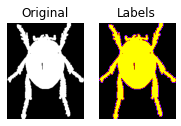

Imagem 110 - classe beetle


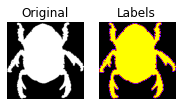

Imagem 111 - classe beetle


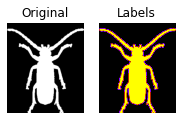

Imagem 112 - classe beetle


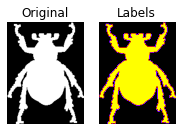

Imagem 113 - classe beetle


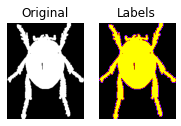

Imagem 114 - classe beetle


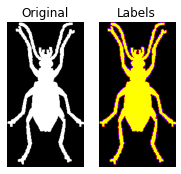

Imagem 115 - classe beetle


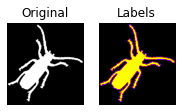

Imagem 116 - classe beetle


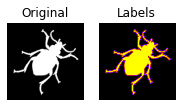

Imagem 117 - classe beetle


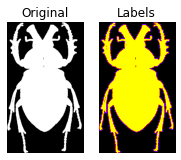

Imagem 118 - classe beetle


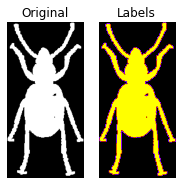

Imagem 119 - classe beetle


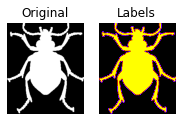

Imagem 120 - classe beetle


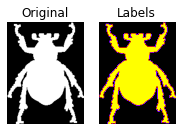

Imagem 121 - classe beetle


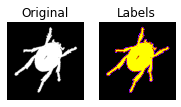

Imagem 122 - classe beetle


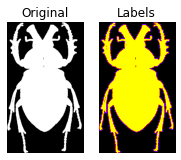

Imagem 123 - classe beetle


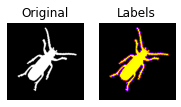

Imagem 124 - classe beetle


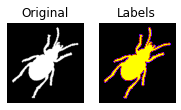

Imagem 125 - classe beetle


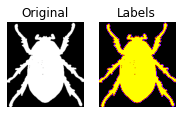

Imagem 126 - classe beetle


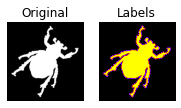

Imagem 127 - classe beetle


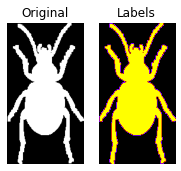

Imagem 128 - classe beetle


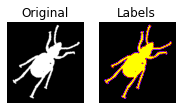

Imagem 129 - classe beetle


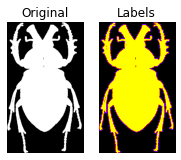

Imagem 130 - classe beetle


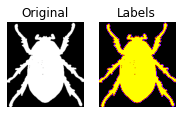

Imagem 131 - classe beetle


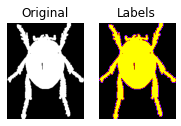

Imagem 132 - classe beetle


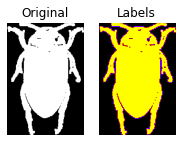

Imagem 133 - classe beetle


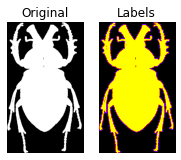

Imagem 134 - classe beetle


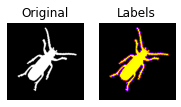

Imagem 135 - classe beetle


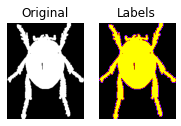

Imagem 136 - classe beetle


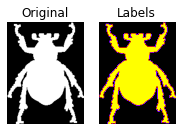

Imagem 137 - classe beetle


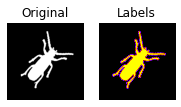

Imagem 138 - classe beetle


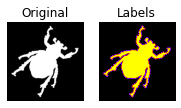

Imagem 139 - classe beetle


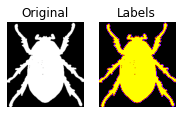

Imagem 140 - classe beetle


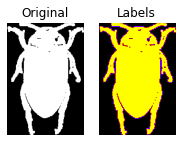

Imagem 141 - classe beetle


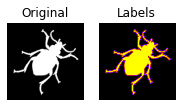

Imagem 142 - classe beetle


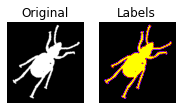

Imagem 143 - classe beetle


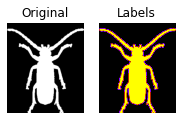

Imagem 144 - classe beetle


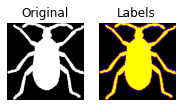

Imagem 145 - classe beetle


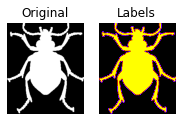

Imagem 146 - classe beetle


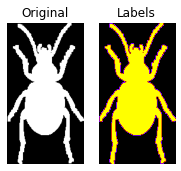

Imagem 147 - classe beetle


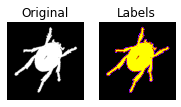

Imagem 148 - classe beetle


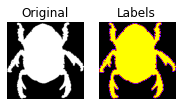

Imagem 149 - classe beetle


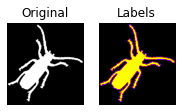

Imagem 150 - classe beetle


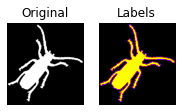

Imagem 151 - classe beetle


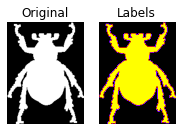

Imagem 152 - classe beetle


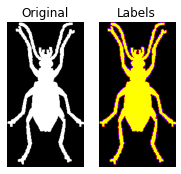

Imagem 153 - classe beetle


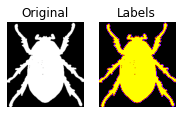

Imagem 154 - classe beetle


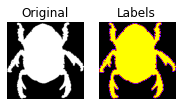

Imagem 155 - classe beetle


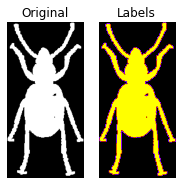

Imagem 156 - classe beetle


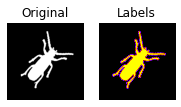

Imagem 157 - classe beetle


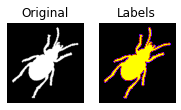

Imagem 158 - classe beetle


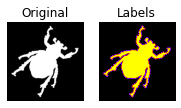

Imagem 159 - classe beetle


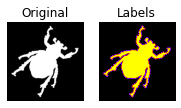

Imagem 160 - classe beetle


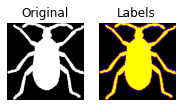

Imagem 161 - classe beetle


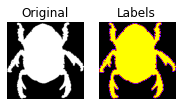

Imagem 162 - classe bone


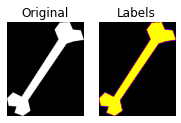

Imagem 163 - classe bone


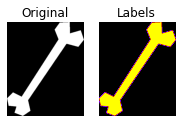

Imagem 164 - classe bone


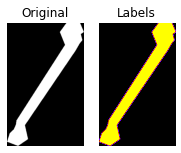

Imagem 165 - classe bone


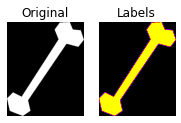

Imagem 166 - classe bone


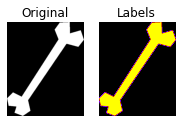

Imagem 167 - classe bone


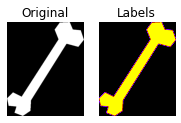

Imagem 168 - classe bone


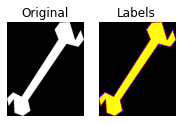

Imagem 169 - classe bone


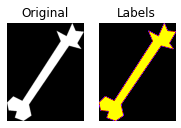

Imagem 170 - classe bone


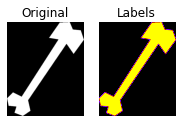

Imagem 171 - classe bone


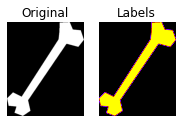

Imagem 172 - classe bone


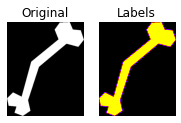

Imagem 173 - classe bone


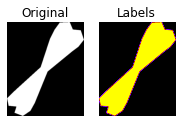

Imagem 174 - classe bone


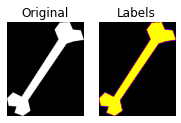

Imagem 175 - classe bone


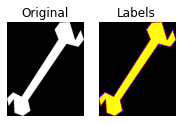

Imagem 176 - classe bone


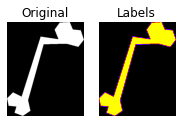

Imagem 177 - classe bone


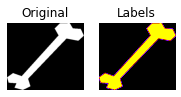

Imagem 178 - classe bone


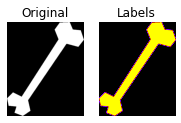

Imagem 179 - classe bone


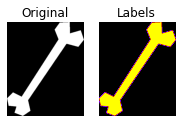

Imagem 180 - classe bone


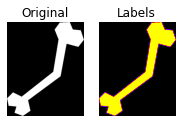

Imagem 181 - classe bone


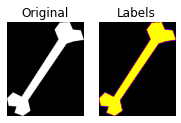

Imagem 182 - classe bone


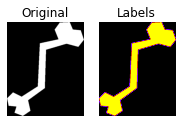

Imagem 183 - classe bone


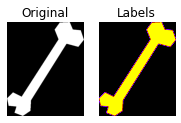

Imagem 184 - classe bone


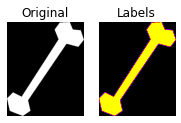

Imagem 185 - classe bone


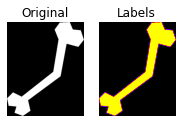

Imagem 186 - classe bone


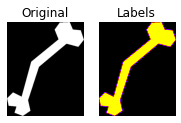

Imagem 187 - classe bone


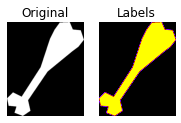

Imagem 188 - classe bone


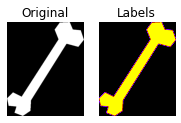

Imagem 189 - classe bone


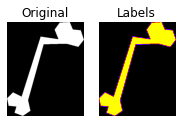

Imagem 190 - classe bone


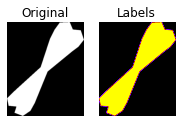

Imagem 191 - classe bone


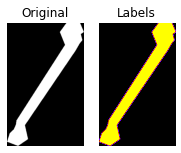

Imagem 192 - classe bone


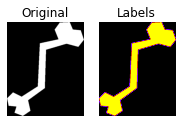

Imagem 193 - classe bone


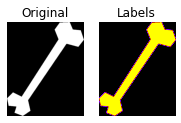

Imagem 194 - classe bone


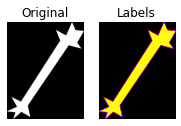

Imagem 195 - classe bone


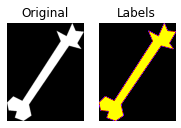

Imagem 196 - classe bone


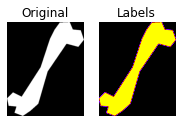

Imagem 197 - classe bone


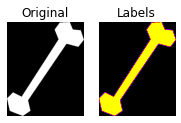

Imagem 198 - classe bone


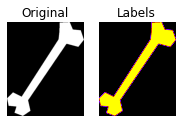

Imagem 199 - classe bone


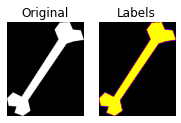

Imagem 200 - classe bone


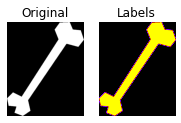

Imagem 201 - classe bone


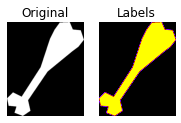

Imagem 202 - classe bone


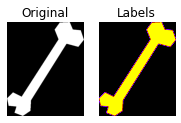

Imagem 203 - classe bone


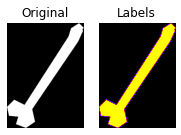

Imagem 204 - classe bone


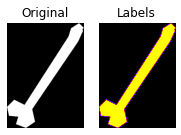

Imagem 205 - classe bone


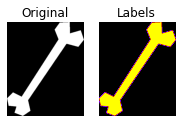

Imagem 206 - classe bone


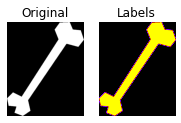

Imagem 207 - classe bone


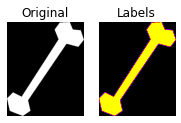

Imagem 208 - classe bone


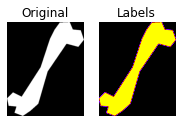

Imagem 209 - classe bone


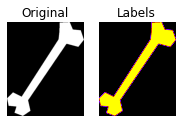

Imagem 210 - classe bone


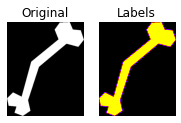

Imagem 211 - classe bone


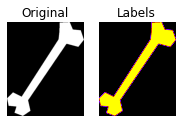

Imagem 212 - classe bone


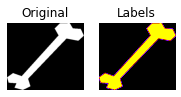

Imagem 213 - classe bone


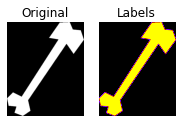

Imagem 214 - classe bone


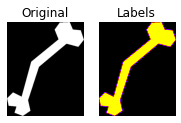

Imagem 215 - classe bone


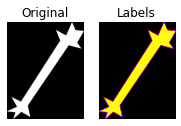

In [ ]:
# Nomes das caracteristicas computadas
features = ['area', 'major_axis', 'minor_axis', 'solidity', 'perimeter']
# Arranjo 2D com as caracteristicas das imagens
feature_mat_t = []

# Lista com os rótulos das imagens
list_label = []

for i, (image, label) in enumerate(zip(image_list_t, label_list_t)):
    # DEBUG
    print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)

    # Calcula a imagem de rótulos
    im_lbl = measure.label(image)

    # Opcional: Plota a imagem original e sua imagem de rótulos
    plots = {'Original': image, 'Labels': im_lbl}
    fig, ax = plt.subplots(1, len(plots), figsize=(3,6))
    for n, (title, img) in enumerate(plots.items()):
        cmap = plt.cm.gnuplot if n == len(plots) - 1 else plt.cm.gray
        ax[n].imshow(img, cmap=cmap)
        ax[n].axis('off')
        ax[n].set_title(title)
    plt.show(fig)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem

    props = measure.regionprops(im_lbl)
    
    # Itera pelas propriedades computadas
    for prop in props:
        # Prop. 0: Area
        area = prop.area
       
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity = prop.solidity 
        
        # Prop. 4: Perímetro
        perimeter = prop.perimeter 

        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, perimeter]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat_t.append(feature_list)

---
# **Converte as listas de características em arrays NumPy**

---



In [ ]:
# Converte a lista de caracteristicas de Treinamento para um arranjo NumPy
feature_map = np.array(feature_mat)

In [ ]:
# Converte a lista de caracteristicas de Teste para um arranjo NumPy
feature_map_test = np.array(feature_mat_t)

In [ ]:
df = pd.DataFrame(feature_map, columns=features)

df['class'] = label_list

print('\033[1m' + '\n-----  Características do conjunto de Treinamento  -----\n' + '\033[0m' )
display(df)


-----  Características do conjunto de Treinamento  -----



area  major_axis  minor_axis  solidity    perimeter  class
0    10893.0  136.193135  104.738131  0.905261   489.079257  apple
1     4954.0   86.408438   75.045475  0.922704   322.634560  apple
2    33790.0  213.809152  206.922351  0.912257   851.678282  apple
3    14117.0  156.533117  116.118723  0.946116   534.014285  apple
4    11604.0  168.862078   89.971428  0.907129   529.842712  apple
..       ...         ...         ...       ...          ...    ...
499  29482.0  649.838829  133.065921  0.453541  1430.391052   bone
500  14773.0  403.668456   87.389657  0.456831   978.460028   bone
501  11568.0  310.053741   82.972093  0.508372   812.021428   bone
502   6160.0  323.888175   32.425545  0.720552   637.719913   bone
503   6455.0  343.098498   46.405778  0.488682   707.327994   bone

[504 rows x 6 columns]

In [ ]:
df_test = pd.DataFrame(feature_map_test, columns=features)

df_test['class_test'] = label_list_t

print('\033[1m' + '\n----------  Características do conjunto de Teste  ----------\n' + '\033[0m' )
display(df_test)


----------  Características do conjunto de Teste  ----------



area  major_axis  minor_axis  solidity    perimeter class_test
0    16702.0  158.800849  140.396894  0.889161   668.771645      apple
1    37498.0  226.518978  216.785362  0.914675   897.435642      apple
2    28279.0  192.649724  190.181886  0.920031   776.565584      apple
3    16702.0  158.800849  140.396894  0.889161   668.771645      apple
4    35963.0  226.672467  206.601821  0.911055   909.542243      apple
..       ...         ...         ...       ...          ...        ...
211  28337.0  652.055063  103.631624  0.459092  1376.474314       bone
212  20864.0  535.623384   94.859767  0.475457  1136.403246       bone
213  31269.0  645.063978  118.958939  0.504127  1476.339321       bone
214  30048.0  645.618973  123.903548  0.478761  1415.746391       bone
215  21933.0  577.986812   73.233919  0.383056  1446.333224       bone

[216 rows x 6 columns]

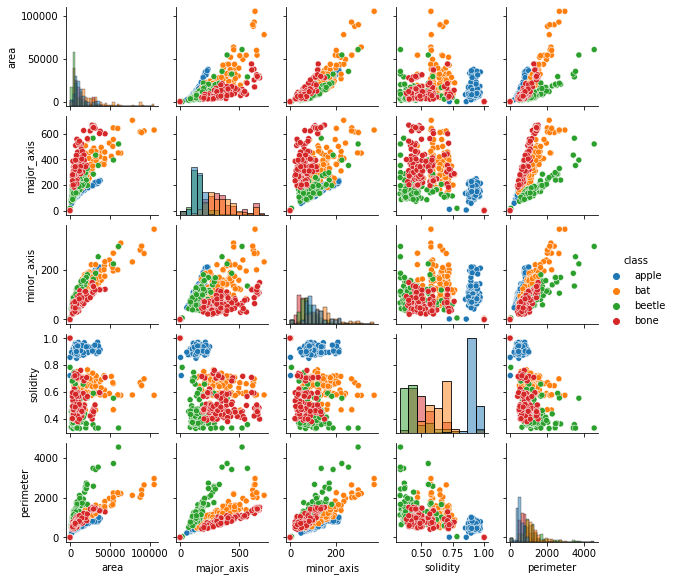

In [ ]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

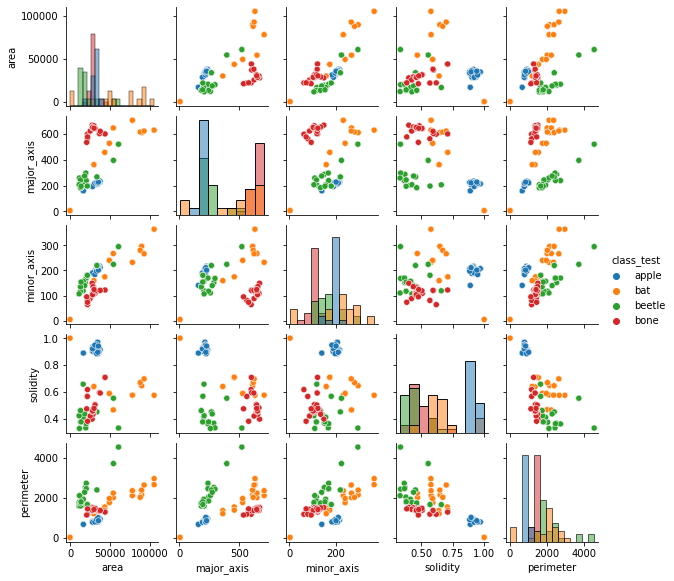

In [ ]:
g = sns.PairGrid(df_test, hue='class_test', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de Treinamento
    print('Média:')
    print(feature_map.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de Treinamento
    print('Desvio padrão:')
    print(feature_map.std(0))

Média:
[14926.8214   252.9488   100.2164     0.6344   953.6541]
Desvio padrão:
[15085.2462   150.0867    57.2206     0.2028   562.7993]


In [ ]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de Teste
    print('Média:')
    print(feature_map_test.mean(0))
    # Desvio padrão das caracteristicas do conjunto de Teste
    print('Desvio padrão:')
    print(feature_map_test.std(0))

Média:
[35908.287    400.3939   171.6393     0.6284  1576.9272]
Desvio padrão:
[23075.1611   212.5497    70.5034     0.2098   802.6737]


---

# **Transformada normal de características**

---




In [ ]:
# Transformada Normal de Caracteristicas de Treinamento
feature_map_norm = (feature_map - feature_map.mean(0)) / feature_map.std(0)

In [ ]:
# Transformada Normal de Caracteristicas de Teste
feature_map_test_norm = (feature_map_test - feature_map_test.mean(0)) / feature_map_test.std(0)

In [ ]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas normalizadas de Treinamento
    print('Média:')
    print(feature_map_norm.mean(0))
    # Desvio padrão das caracteristicas normalizadas de Treinamento
    print('Desvio padrão:')
    print(feature_map_norm.std(0))

Média:
[-0. -0.  0. -0. -0.]
Desvio padrão:
[1. 1. 1. 1. 1.]


In [ ]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas normalizadas de Teste
    print('Média:')
    print(feature_map_test_norm.mean(0))
    # Desvio padrão das caracteristicas normalizadas de Teste
    print('Desvio padrão:')
    print(feature_map_test_norm.std(0))

Média:
[ 0. -0.  0.  0. -0.]
Desvio padrão:
[1. 1. 1. 1. 1.]


In [ ]:
df_norm = pd.DataFrame(feature_map_norm, columns=features)

df_norm['class'] = label_list
print('\033[1m' + '\nCaracterísticas normalizadas do conjunto de Treinamento\n' + '\033[0m' )
display(df_norm)


Características normalizadas do conjunto de Treinamento



area  major_axis  minor_axis  solidity  perimeter  class
0   -0.267402   -0.777921    0.079023  1.335249  -0.825472  apple
1   -0.661098   -1.109628   -0.439893  1.421253  -1.121216  apple
2    1.250439   -0.260780    1.864816  1.369744  -0.181194  apple
3   -0.053683   -0.642400    0.277912  1.536680  -0.745630  apple
4   -0.220270   -0.560254   -0.179044  1.344463  -0.753042  apple
..        ...         ...         ...       ...        ...    ...
499  0.964862    2.644404    0.574085 -0.891871   0.847082   bone
500 -0.010197    1.004217   -0.224163 -0.875652   0.044076   bone
501 -0.222656    0.380479   -0.301365 -0.621539  -0.251657   bone
502 -0.581152    0.472656   -1.184728  0.424577  -0.561362   bone
503 -0.561596    0.600650   -0.940406 -0.718617  -0.437680   bone

[504 rows x 6 columns]

In [ ]:
df_test_norm = pd.DataFrame(feature_map_test_norm, columns=features)

df_test_norm['class_test'] = label_list_t
print('\033[1m' + '\n---  Características normalizadas do conjunto de Teste  ---\n' + '\033[0m' )
display(df_test_norm)


---  Características normalizadas do conjunto de Teste  ---



area  major_axis  minor_axis  solidity  perimeter class_test
0   -0.832336   -1.136643   -0.443134  1.243238  -1.131413      apple
1    0.068893   -0.818044    0.640338  1.364869  -0.846535      apple
2   -0.330628   -0.977391    0.263002  1.390406  -0.997119      apple
3   -0.832336   -1.136643   -0.443134  1.243238  -1.131413      apple
4    0.002371   -0.817321    0.495898  1.347615  -0.831452      apple
..        ...         ...         ...       ...        ...        ...
211 -0.328114    1.184011   -0.964602 -0.807039  -0.249731       bone
212 -0.651969    0.636225   -1.089019 -0.729023  -0.548821       bone
213 -0.201051    1.151119   -0.747204 -0.592342  -0.125316       bone
214 -0.253965    1.153731   -0.677071 -0.713271  -0.200805       bone
215 -0.605642    0.835536   -1.395754 -1.169529  -0.162699       bone

[216 rows x 6 columns]

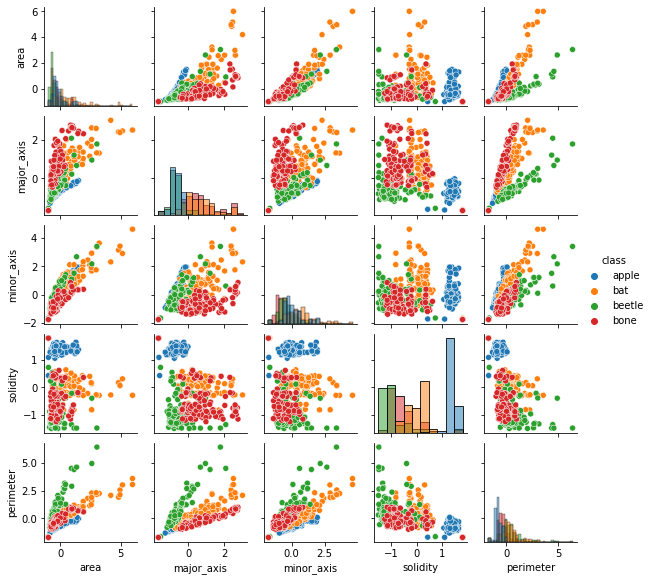

In [ ]:
g = sns.PairGrid(df_norm, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

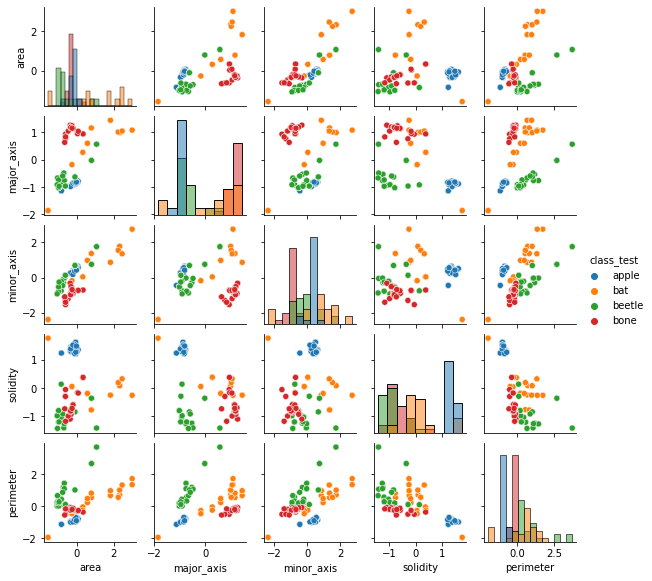

In [ ]:
g = sns.PairGrid(df_test_norm, hue='class_test', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

---

# **Selecionando características e separando parte do conjunto de treinamento para validação**

---



In [ ]:
# Selecionamos apenas duas caracteristicas: Eixo Maior e Perímetro
feature_map_ok = feature_map[:,1:5]
feature_map_test_ok = feature_map_test[:,1:5]

# Separa 25% do conjuto de completo para validação. 75% para treinamento.
X_train, X_val, y_train, y_val = model_selection.train_test_split(feature_map_ok, 
                                                                        label_list, 
                                                                        test_size=0.25, 
                                                                        stratify=label_list,
                                                                        random_state=393)

In [ ]:
# Média das caracteristicas do conjunto de treinamento
X_train_mean = X_train.mean(0)

# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_std = X_train.std(0)

scaler = preprocessing.StandardScaler().fit(X_train)

with np.printoptions(precision=4, suppress=True):
    print(f'Média:  \t {np.array(scaler.mean_)}')
    print(f'Desv. pad.: \t {np.array(scaler.scale_)}')

Média:  	 [249.2089  99.1631   0.6344 947.0485]
Desv. pad.: 	 [146.7444  55.9024   0.2037 568.9477]


In [ ]:
X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
Test_norm = scaler.transform(feature_map_test_ok)

with np.printoptions(precision=4, suppress=True):
    print(f'Treino: \t {X_train_norm.mean():.4f} ± {X_train_norm.std():.4f}')
    print(f'Validação: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Teste:   \t {Test_norm.mean():.4f} ± {Test_norm.std():.4f}')

Treino: 	 -0.0000 ± 1.0000
Validação: 	 0.0561 ± 1.0306
Teste:   	 0.8511 ± 1.3974


---

# **Construindo o classificador K-NN e testando usando o conjunto de validação**

---



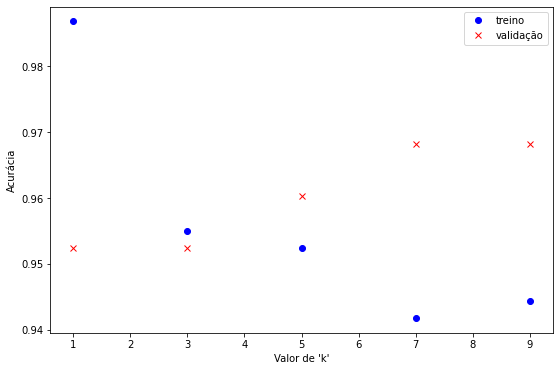

In [ ]:
k_list = [1, 3, 5, 7, 9]
# Lista com as acurácias de treino
acc_train_list = []
# Lista com as acurácias de validação
acc_val_list = []

for k_ in k_list:
    # Constrói um classificador K-NN. K = k_
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_)

    # Treinando o classificador
    clf.fit(X_train_norm, y_train)

    # Testando o classificador (usando o conjunto de validação)
    pred = clf.predict(X_val_norm)
    acc_val = metrics.accuracy_score(y_val, pred)
    
    acc_val_list.append(acc_val)
    
    # Testando o classificador (usando o conjunto de treino)
    pred_train = clf.predict(X_train_norm)
    acc_train = metrics.accuracy_score(y_train, pred_train)
    
    acc_train_list.append(acc_train)  
plt.figure(figsize=(9, 6))

plt.plot(k_list, acc_train_list, 'o', color='blue', label='treino')
plt.plot(k_list, acc_val_list, 'x', color='red', label='validação')
plt.xlabel("Valor de 'k'")
plt.ylabel("Acurácia")
plt.legend(loc='best')

plt.show()

In [ ]:
print('\033[1m' + '\n--------------- Validação ---------------\n' + '\033[0m' )
print('\033[1m' + '\nMatriz de confusão:' + '\033[0m')
print(metrics.confusion_matrix(y_val, pred))

print('\033[1m' + '\nRelatório de classificação:' + '\033[0m')
print(metrics.classification_report(y_val, pred))


--------------- Validação ---------------


Matriz de confusão:
[[32  0  0  0]
 [ 0 30  0  1]
 [ 0  0 30  1]
 [ 0  2  0 30]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
         bat       0.94      0.97      0.95        31
      beetle       1.00      0.97      0.98        31
        bone       0.94      0.94      0.94        32

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



In [ ]:
print('k \t acc. treino \t acc. val')
print('----------------------------')
for k_, acc_t, acc_v in zip(k_list, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = k_list[np.argmax(acc_val_list)]
print(f'\nMelhor \'k\': {k_best} ({np.max(acc_val_list):.4f} acc.)')

k 	 acc. treino 	 acc. val
----------------------------
1 	 0.9868 	 0.9524
3 	 0.9550 	 0.9524
5 	 0.9524 	 0.9603
7 	 0.9418 	 0.9683
9 	 0.9444 	 0.9683

Melhor 'k': 7 (0.9683 acc.)


---

# **Construindo o classificador K-NN usando o conjunto de teste com o melhor 'k' obtido da validação**

---



In [ ]:
# Constrói um classificador K-NN. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf.fit(X_train_norm, y_train)

# Testando o classificador (usando o conjunto de TESTES)
pred = clf.predict(Test_norm)
acc_val = metrics.accuracy_score(label_list_t, pred)

In [ ]:
print('\033[1m' + '\n--------------- Teste ---------------\n' + '\033[0m' )

print('\033[1m' + '\nMatriz de confusão:' + '\033[0m')
print(metrics.confusion_matrix(label_list_t, pred))

print('\033[1m' + '\nRelatório de classificação:' + '\033[0m')
print(metrics.classification_report(label_list_t, pred))


--------------- Teste ---------------


Matriz de confusão:
[[54  0  0  0]
 [ 0 54  0  0]
 [ 0  0 54  0]
 [ 0  0  0 54]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        54
         bat       1.00      1.00      1.00        54
      beetle       1.00      1.00      1.00        54
        bone       1.00      1.00      1.00        54

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

